#  CREDIT EDA CASE STUDY
## Title: "Categorization of Defaulting Loan Recipients: Credit EDA Analysis in the Banking Sector"

#### Objective :
Goal is to conduct Exploratory Data Analysis (EDA) to uncover hidden patterns that can indicate if clients are struggling with their loan payments. This knowledge will guide actionable steps like refining lending decisions, evaluating risks, and enhancing customer-centric initiatives.

#### Import Warnings

In [1]:
import warnings

warnings.filterwarnings('ignore')

#### Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Set display options to show all rows and columns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Read dataset "application_data.csv"

In [4]:
aplcn_df = pd.read_csv("application_data.csv")

In [5]:
aplcn_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Check how many rows & columns

In [6]:
aplcn_df.shape

(6479, 122)

#### Checking Data types

In [7]:
aplcn_df.info(verbose = True) # verbose = True, the program will provide extensive information about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6479 entries, 0 to 6478
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS_E

#### Describing the data


In [8]:
aplcn_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,6479.000000,6479.000000,6479.000000,6.479000e+03,6.479000e+03,6479.00000,6.476000e+03,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,2187.000000,6479.0,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.00000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,2828.000000,6460.000000,5209.000000,3224.000000,2730.000000,3353.000000,2222.000000,1998.000000,3076.000000,3266.000000,3311.000000,2126.000000,2683.000000,2085.000000,3265.000000,2016.000000,2970.000000,3224.000000,2730.000000,3353.000000,2222.000000,1998.000000,3076.000000,3266.000000,3311.000000,2126.000000,2683.000000,2085.000000,3265.000000,2016.000000,2970.000000,3224.000000,2730.000000,3353.000000,2222.000000,1998.000000,3076.000000,3266.000000,3311.000000,2126.000000,2683.000000,2085.000000,3265.000000,2016.000000,2970.000000,3395.000000,6451.000000,6451.000000,6451.000000,6451.000000,6478.000000,6478.0,6478.000000,6478.000000,6478.000000,6478.000000,6478.0,6478.000000,6478.000000,6478.0,6478.000000,6478.0,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000,5616.000000
mean,103785.935175,0.077944,0.411792,1.672615e+05,5.956850e+05,26965.43286,5.357678e+05,0.020995,-16026.210372,63767.996759,-4973.480321,-2960.893039,11.885231,1.0,0.820034,0.201883,0.998148,0.281679,0.054792,2.148943,2.044143,2.024078,12.094459,0.01775,0.050625,0.038123,0.085353,0.234450,0.176107,0.504495,0.515403,0.512760,0.118396,0.089548,0.978543,0.751791,0.044721,0.077831,0.150697,0.226721,0.232805,0.067413,0.099545,0.108341,0.008460,0.027943,0.114371,0.088466,0.977231,0.758473,0.042260,0.073171,0.146194,0.222588,0.228398,0.065869,0.103853,0.106386,0.007879,0.026771,0.119072,0.089166,0.978638,0.755051,0.044949,0.077432,0.150406,0.226401,0.232504,0.068384,0.100997,0.109909,0.008395,0.028160,0.102349,1.385367,0.147574,1.370640,0.103085,-956.127045,0.0,0.707008,0.000154,0.016363,0.084594,0.0,0.080426,0.003859,0.0,0

In [9]:
aplcn_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Fixing columns( identify and delete Unnecessary columns)

In [10]:
Unnecessary_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [11]:
len(Unnecessary_columns)

28

In [12]:
aplcn_df.drop(columns = Unnecessary_columns, axis = 1, inplace = True)

In [13]:
aplcn_df.shape

(6479, 94)

In [14]:
aplcn_df.columns.unique()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 

## Misaligned columns - I didn't find any misaligned columns

# Data Cleaning

## Handling missing values

#### Check null values column wise

In [15]:
aplcn_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    3
NAME_TYPE_SUITE                   25
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                     4292
OCCUPATION_TYPE                 1995
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
R

#### Check % null values column wise

In [16]:
round(100    *    aplcn_df.isnull().sum()   /      len(aplcn_df),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.05
NAME_TYPE_SUITE                  0.39
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.24
OCCUPATION_TYPE                 30.79
CNT_FAM_MEMBERS                  0.00
REGION_RATING_CLIENT             0.00
REGION_RATING_CLIENT_W_CITY      0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_N

#### Create a list of columns having null values more than 45%

In [17]:
# Define the threshold for null values
threshold = len(aplcn_df) * 0.45

# Create a list of columns with null values exceeding the threshold
columns_with_above_45percent_nulls = aplcn_df.columns[aplcn_df.isnull().sum() > threshold].tolist()

In [18]:
len(columns_with_above_45percent_nulls)

49

In [19]:
columns_with_above_45percent_nulls

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

#### Remove the columns having more than 45 % null value

In [20]:
aplcn_df.drop(columns =columns_with_above_45percent_nulls, axis = 1, inplace = True)

#### Recheck shape of dataframe

In [21]:
aplcn_df.shape

(6479, 45)

#### Recheck null values column wise

In [22]:
round(100    *    aplcn_df.isnull().sum()   /      len(aplcn_df),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.05
NAME_TYPE_SUITE                 0.39
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                30.79
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
L

#### Print only the columns with null values

In [23]:
null_columns = (aplcn_df.isnull().sum() / len(aplcn_df)) * 100
print(null_columns[null_columns > 0])

AMT_GOODS_PRICE                0.046303
NAME_TYPE_SUITE                0.385862
OCCUPATION_TYPE               30.791789
EXT_SOURCE_2                   0.293255
EXT_SOURCE_3                  19.601790
OBS_30_CNT_SOCIAL_CIRCLE       0.432165
DEF_30_CNT_SOCIAL_CIRCLE       0.432165
OBS_60_CNT_SOCIAL_CIRCLE       0.432165
DEF_60_CNT_SOCIAL_CIRCLE       0.432165
DAYS_LAST_PHONE_CHANGE         0.015434
AMT_REQ_CREDIT_BUREAU_HOUR    13.319957
AMT_REQ_CREDIT_BUREAU_DAY     13.319957
AMT_REQ_CREDIT_BUREAU_WEEK    13.319957
AMT_REQ_CREDIT_BUREAU_MON     13.319957
AMT_REQ_CREDIT_BUREAU_QRT     13.319957
AMT_REQ_CREDIT_BUREAU_YEAR    13.319957
dtype: float64


#### In 'null_columns' we have a column name 'OCCUPATION_TYPE'.
#### Lets understand the data first.

In [24]:
aplcn_df.OCCUPATION_TYPE.value_counts(dropna = False)

NaN                      1995
Laborers                 1111
Sales staff               699
Core staff                615
Managers                  427
Drivers                   402
High skill tech staff     230
Accountants               209
Medicine staff            190
Security staff            141
Cooking staff             133
Cleaning staff            100
Private service staff      68
Low-skill Laborers         60
Secretaries                36
Waiters/barmen staff       23
Realty agents              17
HR staff                   14
IT staff                    9
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
aplcn_df.OCCUPATION_TYPE.nunique()

18

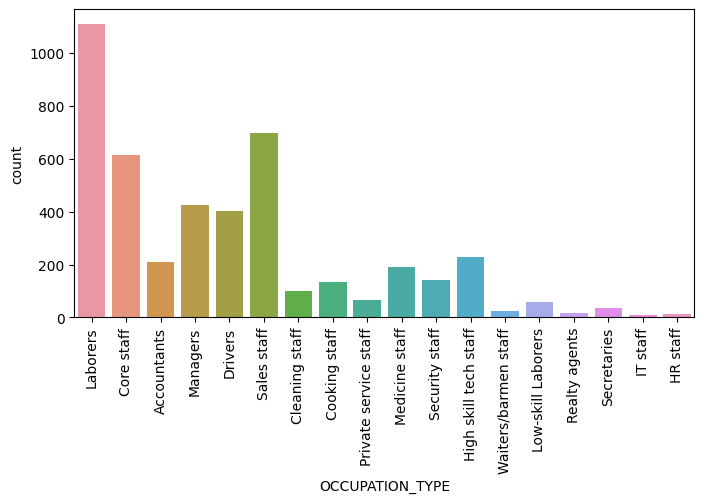

In [26]:
plt.figure(figsize = (8,4))
sns.countplot(data = aplcn_df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

#### Observation

#### • Ignoring null values, Laborers are most number of loan applicant.

In [27]:
aplcn_df.OCCUPATION_TYPE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6479 entries, 0 to 6478
Series name: OCCUPATION_TYPE
Non-Null Count  Dtype 
--------------  ----- 
4484 non-null   object
dtypes: object(1)
memory usage: 50.7+ KB


#### There is a column in dataset name 'ORGANIZATION_TYPE' & 'NAME_INCOME_TYPE'. Lets analyse both of them.
#### Lets see whether we get some helpful information or not.

In [28]:
aplcn_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    1426
XNA                       1166
Self-employed              850
Other                      364
Medicine                   238
Government                 221
Business Entity Type 2     200
School                     182
Kindergarten               158
Trade: type 7              136
Construction               130
Business Entity Type 1     109
Transport: type 4          105
Housing                     79
Trade: type 3               79
Industry: type 3            74
Industry: type 11           64
Industry: type 9            64
Transport: type 2           58
Services                    57
Security                    56
Bank                        55
Military                    49
Police                      49
Agriculture                 48
Postal                      41
Security Ministries         39
Trade: type 2               34
Restaurant                  30
University                  27
Industry: type 7            27
Transport: type 3           26
Industry

#### There is a another column name 'NAME_INCOME_TYPE'. lets analyse it, if we get some information from there.

In [29]:
aplcn_df.NAME_INCOME_TYPE.value_counts()

Working                 3380
Commercial associate    1502
Pensioner               1164
State servant            431
Unemployed                 2
Name: NAME_INCOME_TYPE, dtype: int64

#### There is a category name 'Pensioner'  in 'NAME_INCOME_TYPE', Lets compare those rows with 'OCCUPATION_TYPE'

In [30]:
# Filter rows where 'NAME_INCOME_TYPE' is 'Pensioner'
pensioner_data = aplcn_df[aplcn_df['NAME_INCOME_TYPE'] == 'Pensioner']

# Get value counts of 'OCCUPATION_TYPE' for pensioners
occupation_counts = pensioner_data['OCCUPATION_TYPE'].value_counts()

print(occupation_counts)

Series([], Name: OCCUPATION_TYPE, dtype: int64)


#### Observation

#### •  Can't find anything suitable information from 'NAME_INCOME_TYPE' & 'ORGANIZATION_TYPE' columns.
#### • Here for imputation best option is 'Unknown' instead of min/median/mode.

In [31]:
aplcn_df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

#### Checking 'EXT_SOURCE_2' & 'EXT_SOURCE_3'

In [32]:
np.round(aplcn_df['EXT_SOURCE_2'].describe(),2)

count    6460.00
mean        0.52
std         0.19
min         0.00
25%         0.39
50%         0.57
75%         0.67
max         0.85
Name: EXT_SOURCE_2, dtype: float64

In [33]:
np.round(aplcn_df['EXT_SOURCE_3'].describe(),2)

count    5209.00
mean        0.51
std         0.20
min         0.00
25%         0.38
50%         0.54
75%         0.67
max         0.88
Name: EXT_SOURCE_3, dtype: float64

#### Observation

####  • As 'EXT_SOURCE_3' null values are very high and describe is almost same as'EXT_SOURCE_2 , So, decide to drop 'EXT_SOURCE_3' & keep 'EXT_SOURCE_2'

In [34]:
aplcn_df = aplcn_df.drop(columns=['EXT_SOURCE_3']) # droping 'EXT_SOURCE_3' column

#### Rechecking columns who having null values

In [35]:
null_columns = (aplcn_df.isnull().sum() / len(aplcn_df)) * 100
print(null_columns[null_columns > 0])

AMT_GOODS_PRICE                0.046303
NAME_TYPE_SUITE                0.385862
EXT_SOURCE_2                   0.293255
OBS_30_CNT_SOCIAL_CIRCLE       0.432165
DEF_30_CNT_SOCIAL_CIRCLE       0.432165
OBS_60_CNT_SOCIAL_CIRCLE       0.432165
DEF_60_CNT_SOCIAL_CIRCLE       0.432165
DAYS_LAST_PHONE_CHANGE         0.015434
AMT_REQ_CREDIT_BUREAU_HOUR    13.319957
AMT_REQ_CREDIT_BUREAU_DAY     13.319957
AMT_REQ_CREDIT_BUREAU_WEEK    13.319957
AMT_REQ_CREDIT_BUREAU_MON     13.319957
AMT_REQ_CREDIT_BUREAU_QRT     13.319957
AMT_REQ_CREDIT_BUREAU_YEAR    13.319957
dtype: float64


#### Imputing missing values

#### 1. Check 'AMT_ANNUITY' column

In [36]:
aplcn_df.AMT_ANNUITY.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6479 entries, 0 to 6478
Series name: AMT_ANNUITY
Non-Null Count  Dtype  
--------------  -----  
6479 non-null   float64
dtypes: float64(1)
memory usage: 50.7 KB


In [37]:
aplcn_df.AMT_ANNUITY.describe()

count      6479.00000
mean      26965.43286
std       14386.55766
min        2596.50000
25%       16368.75000
50%       24853.50000
75%       34587.00000
max      135936.00000
Name: AMT_ANNUITY, dtype: float64

In [38]:
aplcn_df.AMT_ANNUITY.median()

24853.5

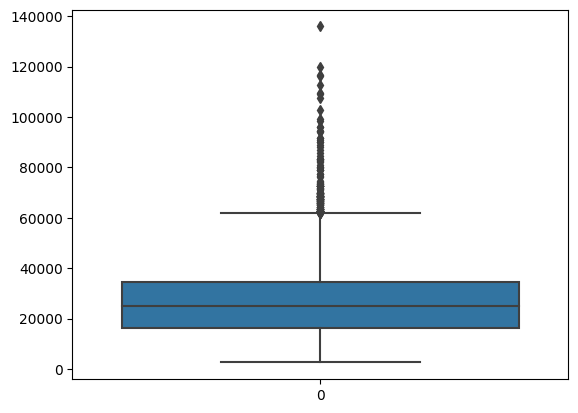

In [39]:
sns.boxplot(aplcn_df.AMT_ANNUITY)
plt.show()

#### Here for imputation median is safe for 'AMT_ANNUITY' column

In [40]:
med_amt_annuity = aplcn_df['AMT_ANNUITY'].median()
aplcn_df['AMT_ANNUITY'].fillna(med_amt_annuity, inplace=True)

#### 2. Checking 'AMT_GOODS_PRICE' column

In [41]:
aplcn_df.AMT_GOODS_PRICE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6479 entries, 0 to 6478
Series name: AMT_GOODS_PRICE
Non-Null Count  Dtype  
--------------  -----  
6476 non-null   float64
dtypes: float64(1)
memory usage: 50.7 KB


In [42]:
aplcn_df.AMT_GOODS_PRICE.describe()

count    6.476000e+03
mean     5.357678e+05
std      3.684406e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.254500e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [43]:
aplcn_df.AMT_GOODS_PRICE.median()

450000.0

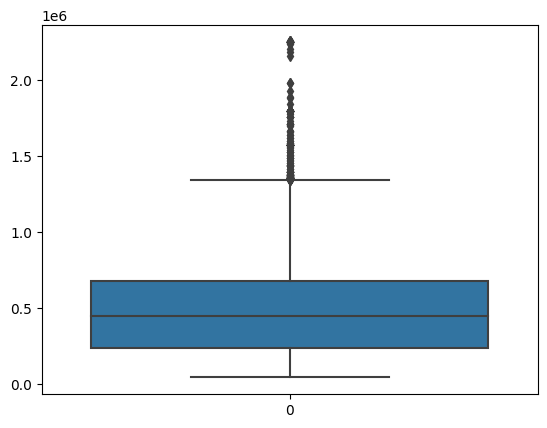

In [44]:
sns.boxplot(aplcn_df.AMT_GOODS_PRICE)
plt.show()

In [45]:
aplcn_df[aplcn_df['AMT_GOODS_PRICE'].isnull()].head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519,-1834,Core staff,4,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,2.0,1.0,2.0,1.0,-2011.0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,-1289,-1948,Private service staff,2,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.464614,0.0,0.0,0.0,0.0,-476.0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,0,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.008474,-9727,-2712,-4132,-800,Accountants,2,2,2,WEDNESDAY,18,0,0,0,0,0,0,Trade: type 7,0.565849,1.0,1.0,1.0,0.0,-643.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
aplcn_df.AMT_GOODS_PRICE.value_counts(dropna= False)

225000.0     544
450000.0     514
675000.0     508
900000.0     319
270000.0     258
180000.0     252
454500.0     202
1125000.0    183
135000.0     170
679500.0     118
315000.0     108
1350000.0    103
360000.0      99
238500.0      99
247500.0      85
540000.0      79
463500.0      73
405000.0      67
90000.0       66
585000.0      61
495000.0      61
472500.0      60
202500.0      60
157500.0      52
630000.0      52
337500.0      50
112500.0      49
1800000.0     46
148500.0      44
688500.0      42
229500.0      41
720000.0      39
810000.0      39
945000.0      35
1575000.0     34
382500.0      33
283500.0      32
477000.0      32
234000.0      32
67500.0       30
45000.0       29
765000.0      27
328500.0      27
292500.0      26
252000.0      25
904500.0      24
855000.0      22
562500.0      21
990000.0      21
468000.0      20
427500.0      20
193500.0      20
1035000.0     19
103500.0      19
913500.0      19
459000.0      18
922500.0      18
1354500.0     18
81000.0       

#### As the % of null values are very low in 'AMT_GOODS_PRICE', NaN values present in Revolving Loan and it is not for purchasing any goods. So, better to impute 0

In [47]:
aplcn_df['AMT_GOODS_PRICE'].fillna(0, inplace=True)

#### 3. Checking 'NAME_TYPE_SUITE' column

In [48]:
aplcn_df.NAME_TYPE_SUITE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6479 entries, 0 to 6478
Series name: NAME_TYPE_SUITE
Non-Null Count  Dtype 
--------------  ----- 
6454 non-null   object
dtypes: object(1)
memory usage: 50.7+ KB


In [49]:
aplcn_df['NAME_TYPE_SUITE'].value_counts() # find counts of all category present in 'NAME_TYPE_SUITE' column

Unaccompanied      5244
Family              855
Spouse, partner     242
Children             60
Other_B              34
Other_A              13
Group of people       6
Name: NAME_TYPE_SUITE, dtype: int64

In [50]:
NAME_TYPE_SUITE_mode = aplcn_df['NAME_TYPE_SUITE'].mode()[0] # [0] indicates only mode, as '.mode' returns mode and count

In [51]:
NAME_TYPE_SUITE_mode # most frequent value

'Unaccompanied'

#### Replace missing values in 'NAME_TYPE_SUITE' with mode value

In [52]:
aplcn_df['NAME_TYPE_SUITE'].fillna(NAME_TYPE_SUITE_mode, inplace=True)

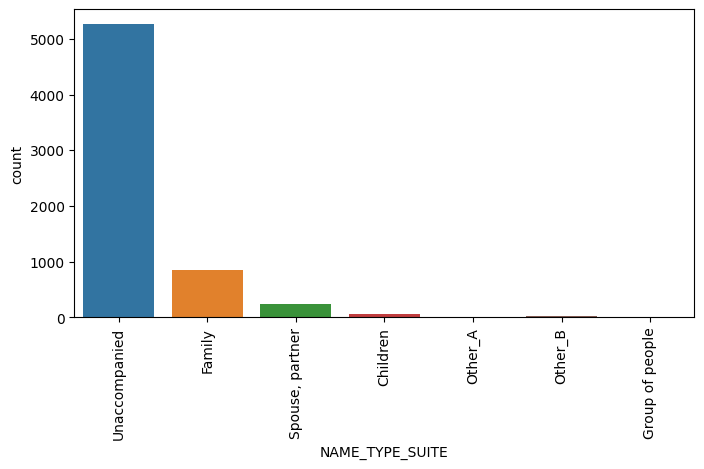

In [53]:
plt.figure(figsize = (8,4))
sns.countplot(data = aplcn_df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

#### Observation

#### • seeing the above countplot, Unaccompanied category is the most number of loan applicant.

#### 4. Checking 'CNT_FAM_MEMBERS' column

In [54]:
aplcn_df.CNT_FAM_MEMBERS.describe()

count    6479.000000
mean        2.148943
std         0.901721
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [55]:
aplcn_df.CNT_FAM_MEMBERS.value_counts()

2    3376
1    1410
3    1121
4     476
5      86
6       8
9       1
7       1
Name: CNT_FAM_MEMBERS, dtype: int64

In [56]:
aplcn_df.CNT_FAM_MEMBERS.median()

2.0

#### Here mean and median almost same in 'CNT_FAM_MEMBERS' column, for imputing we can use both, lets impute missing values by median

In [57]:
med_CNT_FAM_MEMBERS = aplcn_df['CNT_FAM_MEMBERS'].median()

In [58]:
aplcn_df['CNT_FAM_MEMBERS'].fillna(med_CNT_FAM_MEMBERS, inplace=True)

#### 5. Checking 'EXT_SOURCE_2' column

In [59]:
aplcn_df.EXT_SOURCE_2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6479 entries, 0 to 6478
Series name: EXT_SOURCE_2
Non-Null Count  Dtype  
--------------  -----  
6460 non-null   float64
dtypes: float64(1)
memory usage: 50.7 KB


In [60]:
aplcn_df.EXT_SOURCE_2.describe()

count    6460.000000
mean        0.515403
std         0.190186
min         0.000074
25%         0.392752
50%         0.567360
75%         0.665052
max         0.855000
Name: EXT_SOURCE_2, dtype: float64

In [61]:
aplcn_df.EXT_SOURCE_2.median()

0.567360238

#### Replacing missing values in 'EXT_SOURCE_2' column with median

In [62]:
med_EXT_SOURCE_2 = aplcn_df.EXT_SOURCE_2.median()

In [63]:
aplcn_df['EXT_SOURCE_2'].fillna(med_EXT_SOURCE_2, inplace=True)

#### Checking 'OBS_30_CNT_SOCIAL_CIRCLE' , 'DEF_30_CNT_SOCIAL_CIRCLE' , 'OBS_60_CNT_SOCIAL_CIRCLE' , 'DEF_60_CNT_SOCIAL_CIRCLE' columns

#### 1. OBS_30_CNT_SOCIAL_CIRCLE

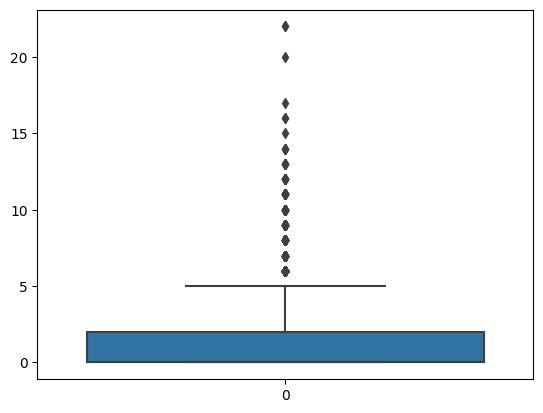

In [64]:
sns.boxplot(aplcn_df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [65]:
med_OBS_30_CNT_SOCIAL_CIRCLE = aplcn_df.OBS_30_CNT_SOCIAL_CIRCLE.median()
med_OBS_30_CNT_SOCIAL_CIRCLE

0.0

#### Observation
#### • OBS_30_CNT_SOCIAL_CIRCLE column has outlier in 50 and 350 approximately.  
#### • median is 0

#### 2. DEF_30_CNT_SOCIAL_CIRCLE

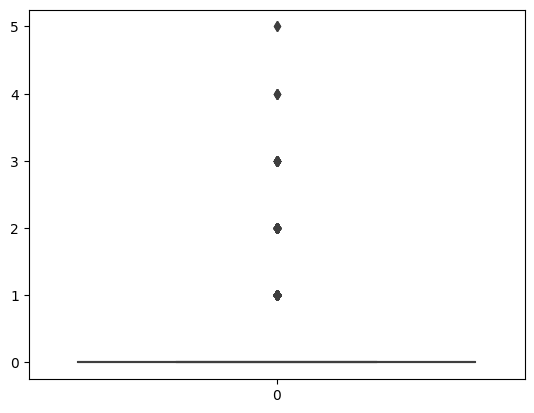

In [66]:
sns.boxplot(aplcn_df.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [67]:
med_DEF_30_CNT_SOCIAL_CIRCLE = aplcn_df.DEF_30_CNT_SOCIAL_CIRCLE.median()
med_DEF_30_CNT_SOCIAL_CIRCLE

0.0

#### Observation
#### DEF_30_CNT_SOCIAL_CIRCLE has outlier in 35 approximately.
#### median is 0

#### 3. OBS_60_CNT_SOCIAL_CIRCLE

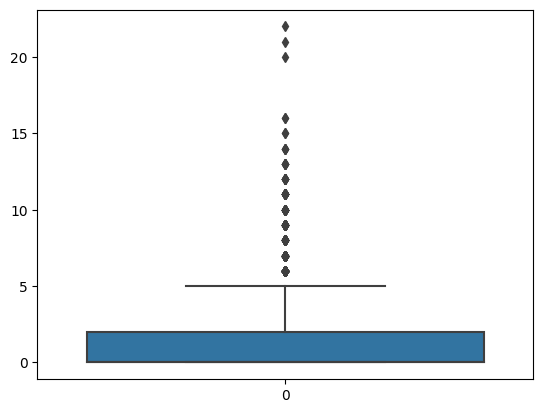

In [68]:
sns.boxplot(aplcn_df.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [69]:
med_OBS_60_CNT_SOCIAL_CIRCLE = aplcn_df.OBS_60_CNT_SOCIAL_CIRCLE.median()
med_OBS_60_CNT_SOCIAL_CIRCLE

0.0

#### Observation
#### OBS_60_CNT_SOCIAL_CIRCLE has outlier in 50 and 350 approximately.
#### median is 0

#### 4. DEF_60_CNT_SOCIAL_CIRCLE

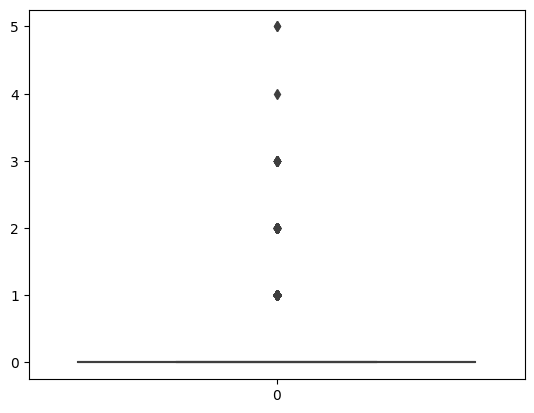

In [70]:
sns.boxplot(aplcn_df.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [71]:
med_DEF_60_CNT_SOCIAL_CIRCLE = aplcn_df.DEF_60_CNT_SOCIAL_CIRCLE.median()
med_DEF_60_CNT_SOCIAL_CIRCLE

0.0

In [72]:
#### Observation
#### DEF_60_CNT_SOCIAL_CIRCLE has many outliers, highest is around 24.
#### median is 0

#### As per above boxplot, each column having outliers, So, for imputing median is the best option

In [73]:
aplcn_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(med_OBS_30_CNT_SOCIAL_CIRCLE, inplace=True)

In [74]:
aplcn_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(med_DEF_30_CNT_SOCIAL_CIRCLE, inplace=True)

In [75]:
aplcn_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(med_OBS_60_CNT_SOCIAL_CIRCLE, inplace=True)

In [76]:
aplcn_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(med_DEF_60_CNT_SOCIAL_CIRCLE, inplace=True)

#### 6. Checking 'DAYS_LAST_PHONE_CHANGE' column

In [77]:
aplcn_df.DAYS_LAST_PHONE_CHANGE.describe()

count    6478.000000
mean     -956.127045
std       822.965594
min     -3882.000000
25%     -1549.750000
50%      -745.000000
75%      -262.250000
max         0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

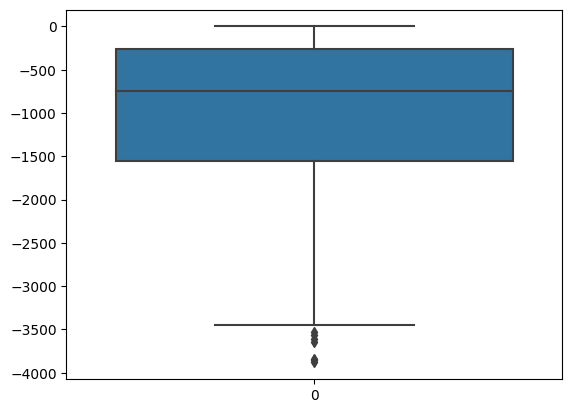

In [78]:
sns.boxplot(aplcn_df.DAYS_LAST_PHONE_CHANGE)
plt.show()

In [79]:
med_DAYS_LAST_PHONE_CHANGE = aplcn_df.DAYS_LAST_PHONE_CHANGE.median()
med_DAYS_LAST_PHONE_CHANGE

-745.0

#### Observation
#### • DAYS_LAST_PHONE_CHANGE has many outliers
#### • value is negetibe. required to convert it in positive.
#### • median is -757

#### Replace missing values in 'DAYS_LAST_PHONE_CHANGE' with median

In [80]:
aplcn_df['DAYS_LAST_PHONE_CHANGE'].fillna(med_DAYS_LAST_PHONE_CHANGE, inplace=True)

#### 7. Checking 'AMT_REQ_CREDIT_BUREAU_HOUR' , 'AMT_REQ_CREDIT_BUREAU_DAY' , 'AMT_REQ_CREDIT_BUREAU_WEEK' , 'AMT_REQ_CREDIT_BUREAU_MON' , 'AMT_REQ_CREDIT_BUREAU_QRT' , 'AMT_REQ_CREDIT_BUREAU_YEAR' columns

In [81]:
aplcn_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    5574
1.0      41
2.0       1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [82]:
aplcn_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    5580
1.0      31
4.0       3
3.0       1
2.0       1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [83]:
aplcn_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    5429
1.0     178
2.0       5
3.0       3
4.0       1
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [84]:
aplcn_df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     4700
1.0      691
2.0      112
3.0       45
4.0       22
5.0       11
7.0        7
8.0        7
6.0        6
9.0        4
11.0       4
16.0       3
10.0       2
12.0       1
14.0       1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [85]:
aplcn_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0    4500
1.0     776
2.0     288
3.0      39
4.0      10
8.0       1
5.0       1
6.0       1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [86]:
aplcn_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     1508
1.0     1369
2.0     1072
3.0      702
4.0      434
5.0      240
6.0      131
7.0       89
8.0       46
9.0       21
11.0       2
10.0       1
13.0       1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

#### It seems to be a categorical column, As each value in this column indicates a specific count of inquiries, which makes it categorical in nature. So, lets replace the missing values by mode

In [87]:
mode_AMT_REQ_CREDIT_BUREAU_HOUR = aplcn_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]
aplcn_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(mode_AMT_REQ_CREDIT_BUREAU_HOUR, inplace=True)

In [88]:
mode_AMT_REQ_CREDIT_BUREAU_DAY = aplcn_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]
aplcn_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(mode_AMT_REQ_CREDIT_BUREAU_DAY, inplace=True)

In [89]:
mode_AMT_REQ_CREDIT_BUREAU_WEEK = aplcn_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]
aplcn_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(mode_AMT_REQ_CREDIT_BUREAU_WEEK, inplace=True)

In [90]:
mode_AMT_REQ_CREDIT_BUREAU_MON = aplcn_df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]
aplcn_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(mode_AMT_REQ_CREDIT_BUREAU_MON, inplace=True)

In [91]:
mode_AMT_REQ_CREDIT_BUREAU_QRT = aplcn_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
aplcn_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(mode_AMT_REQ_CREDIT_BUREAU_QRT, inplace=True)

In [92]:
mode_AMT_REQ_CREDIT_BUREAU_YEAR = aplcn_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]
aplcn_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(mode_AMT_REQ_CREDIT_BUREAU_YEAR, inplace=True)

#### Checking again missing values present in data frame 'aplcn_df'

In [93]:
aplcn_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

## Checking disguised Missing values


In [94]:
aplcn_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

In [95]:
# unique values for each column
for column in aplcn_df.columns:
    unique_values = aplcn_df[column].unique()
    print(column, ":", unique_values)

SK_ID_CURR : [100002 100003 100004 ... 107552 107553 107555]
TARGET : [1 0]
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F']
CNT_CHILDREN : [0 1 2 3 4 7 5]
AMT_INCOME_TOTAL : [ 202500.     270000.      67500.     135000.     121500.      99000.
  171000.     360000.     112500.      38419.155  225000.     189000.
  157500.     108000.      81000.      90000.     450000.      83250.
  292500.     198000.     180000.     130500.      54000.     540000.
   76500.     324000.     103500.      94500.     126000.      72000.
  193500.     315000.     243000.      85500.     162000.     117000.
  247500.     144000.     175500.      58500.     119250.     111915.
  164250.     216000.      63000.      49500.     337500.     308250.
   73341.     153000.      87750.      36000.     382500.     166500.
   69750.     765000.      45000.     630000.     405000.     472500.
   40500.     148500.     607500.     211500.     252000.     111919.5
  184500.      96750.    

#### Observations
#### • We clearly see that column name 'CODE_GENDER' , 'NAME_FAMILY_STATUS' & 'ORGANIZATION_TYPE' has 'XNA' & 'Unknown' values. Lets examine them

#### 1. 'CODE_GENDER'

In [96]:
aplcn_df.CODE_GENDER.value_counts()

F    4296
M    2183
Name: CODE_GENDER, dtype: int64

In [97]:
aplcn_df.CODE_GENDER.mode()[0]

'F'

#### Lets replace XNA to F in 'CODE_GENDER' column as most frequent value is 'F'

In [98]:
aplcn_df['CODE_GENDER'] = aplcn_df['CODE_GENDER'].replace('XNA',aplcn_df.CODE_GENDER.mode()[0])

#### 2. 'NAME_FAMILY_STATUS'

In [99]:
aplcn_df.NAME_FAMILY_STATUS.value_counts()

Married                 4172
Single / not married     945
Civil marriage           604
Separated                411
Widow                    347
Name: NAME_FAMILY_STATUS, dtype: int64

#### Print data frame which having 'Unknown' value in NAME_FAMILY_STATUS' column for checking status with 'CNT_CHILDREN' & 'CNT_FAM_MEMBERS' column

In [100]:
unknown_rows = aplcn_df[aplcn_df['NAME_FAMILY_STATUS'] == 'Unknown']
unknown_rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


#### We clearly see that for above rows having 0 children and 2 family members. So, better to replace Unknown values with 'Married', we also see that Married has most frequent value or mode value in 'NAME_FAMILY_STATUS' column

In [101]:
aplcn_df['NAME_FAMILY_STATUS'] = aplcn_df['NAME_FAMILY_STATUS'].replace('Unknown',aplcn_df.NAME_FAMILY_STATUS.mode()[0])

#### 3. 'ORGANIZATION_TYPE'

In [102]:
aplcn_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    1426
XNA                       1166
Self-employed              850
Other                      364
Medicine                   238
Government                 221
Business Entity Type 2     200
School                     182
Kindergarten               158
Trade: type 7              136
Construction               130
Business Entity Type 1     109
Transport: type 4          105
Housing                     79
Trade: type 3               79
Industry: type 3            74
Industry: type 11           64
Industry: type 9            64
Transport: type 2           58
Services                    57
Security                    56
Bank                        55
Military                    49
Police                      49
Agriculture                 48
Postal                      41
Security Ministries         39
Trade: type 2               34
Restaurant                  30
University                  27
Industry: type 7            27
Transport: type 3           26
Industry

#### Lets check 'NAME_INCOME_TYPE' column as we know that income is releated to organization

In [103]:
aplcn_df.NAME_INCOME_TYPE.value_counts()

Working                 3380
Commercial associate    1502
Pensioner               1164
State servant            431
Unemployed                 2
Name: NAME_INCOME_TYPE, dtype: int64

#### We clearly see that 'Pensioner' value of 'NAME_INCOME_TYPE' column almost exact match 'XNA' value of 'ORGANIZATION_TYPE' column. So, lets replace 'XNA' value with 'Pensioner' in 'ORGANIZATION_TYPE' column

In [104]:
aplcn_df['ORGANIZATION_TYPE'] = aplcn_df['ORGANIZATION_TYPE'].replace('XNA','Pensioner')

## Data Standardising

#### Prteviously, during checking unique value of each column, find some negative(-) values, lets transform those values to positive(+)

#### negative value columns are 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'

In [105]:
aplcn_df.DAYS_BIRTH = aplcn_df.DAYS_BIRTH.apply(abs)
aplcn_df.DAYS_EMPLOYED = aplcn_df.DAYS_EMPLOYED.apply(abs)
aplcn_df.DAYS_REGISTRATION = aplcn_df.DAYS_REGISTRATION.apply(abs)
aplcn_df.DAYS_ID_PUBLISH = aplcn_df.DAYS_ID_PUBLISH.apply(abs)
aplcn_df.DAYS_LAST_PHONE_CHANGE = aplcn_df.DAYS_LAST_PHONE_CHANGE.apply(abs)

#### Converts Days to Years and rename columns

In [106]:
aplcn_df['DAYS_BIRTH'] = aplcn_df['DAYS_BIRTH'] / 365
aplcn_df.rename({'DAYS_BIRTH':'YEARS_AGE'}, axis=1, inplace=True)

In [107]:
aplcn_df['DAYS_EMPLOYED'] = aplcn_df['DAYS_EMPLOYED'] / 365
aplcn_df.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

In [108]:
aplcn_df['DAYS_REGISTRATION'] = aplcn_df['DAYS_REGISTRATION'] / 365
aplcn_df.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION'}, axis=1, inplace=True)

In [109]:
aplcn_df['DAYS_ID_PUBLISH'] = aplcn_df['DAYS_ID_PUBLISH'] / 365
aplcn_df.rename({'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [110]:
aplcn_df['DAYS_LAST_PHONE_CHANGE'] = aplcn_df['DAYS_LAST_PHONE_CHANGE'] / 365
aplcn_df.rename({'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'}, axis=1, inplace=True)

#### Checking Dataset

In [111]:
aplcn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6479 entries, 0 to 6478
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   6479 non-null   int64  
 1   TARGET                       6479 non-null   int64  
 2   NAME_CONTRACT_TYPE           6479 non-null   object 
 3   CODE_GENDER                  6479 non-null   object 
 4   CNT_CHILDREN                 6479 non-null   int64  
 5   AMT_INCOME_TOTAL             6479 non-null   float64
 6   AMT_CREDIT                   6479 non-null   float64
 7   AMT_ANNUITY                  6479 non-null   float64
 8   AMT_GOODS_PRICE              6479 non-null   float64
 9   NAME_TYPE_SUITE              6479 non-null   object 
 10  NAME_INCOME_TYPE             6479 non-null   object 
 11  NAME_EDUCATION_TYPE          6479 non-null   object 
 12  NAME_FAMILY_STATUS           6479 non-null   object 
 13  NAME_HOUSING_TYPE 

#### Create an 'AGE_GROUP' column from 'YEARS_AGE' column

<Axes: >

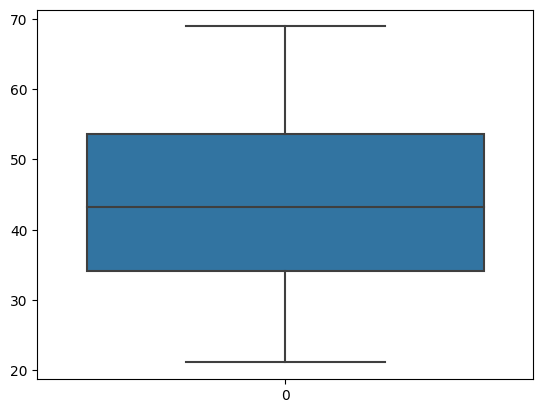

In [112]:
sns.boxplot(aplcn_df.YEARS_AGE)

In [113]:
aplcn_df.YEARS_AGE.describe() # for checking min and max age

count    6479.000000
mean       43.907426
std        11.865814
min        21.109589
25%        34.078082
50%        43.306849
75%        53.630137
max        68.931507
Name: YEARS_AGE, dtype: float64

In [114]:
aplcn_df['AGE_GROUP']= pd.cut(aplcn_df.YEARS_AGE,bins=[20,30,40,50,60,70])
aplcn_df['AGE_GROUP'].value_counts(normalize=True)

(30, 40]    0.265010
(40, 50]    0.256830
(50, 60]    0.222102
(20, 30]    0.143695
(60, 70]    0.112363
Name: AGE_GROUP, dtype: float64

#### Create 'YEARS_EMPLOYED_RANGE' column from 'YEARS_EMPLOYED' column

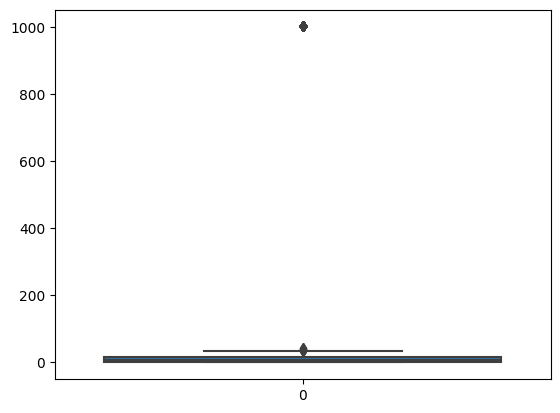

In [115]:
sns.boxplot(aplcn_df.YEARS_EMPLOYED)
plt.show()

In [116]:
aplcn_df.YEARS_EMPLOYED.describe()

count    6479.000000
mean      185.464874
std       381.967939
min         0.046575
25%         2.534247
50%         6.178082
75%        15.526027
max      1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [117]:
aplcn_df['YEARS_EMPLOYED_RANGE']= pd.cut(aplcn_df.YEARS_EMPLOYED,bins=[0,5,10,20,35,9999999])
aplcn_df['YEARS_EMPLOYED_RANGE'].value_counts(normalize=True)

(0, 5]           0.437722
(5, 10]          0.213459
(35, 9999999]    0.182590
(10, 20]         0.126717
(20, 35]         0.039512
Name: YEARS_EMPLOYED_RANGE, dtype: float64

#### Create a 'INCOME_RANGE' column from 'AMT_INCOME_TOTAL' column

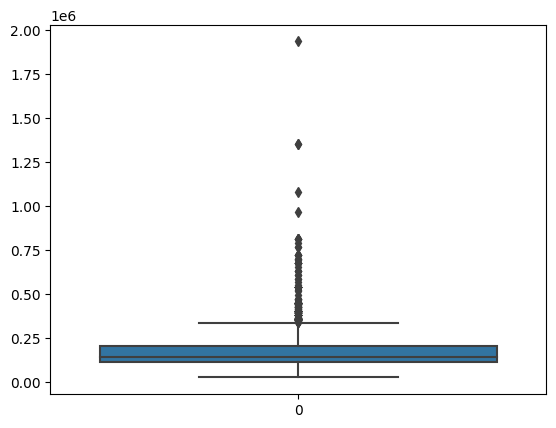

In [118]:
sns.boxplot(aplcn_df.AMT_INCOME_TOTAL)
plt.show()

In [119]:
aplcn_df['INCOME_RANGE']= pd.cut(aplcn_df.AMT_INCOME_TOTAL,bins=[0,100000,200000,300000,400000,500000,99999999])
aplcn_df['INCOME_RANGE'].value_counts(normalize=True)

(100000, 200000]      0.502238
(0, 100000]           0.215620
(200000, 300000]      0.203889
(300000, 400000]      0.051860
(400000, 500000]      0.017595
(500000, 99999999]    0.008798
Name: INCOME_RANGE, dtype: float64

#### Create 'AMT_CREDIT_RANGE' column from 'AMT_CREDIT' column

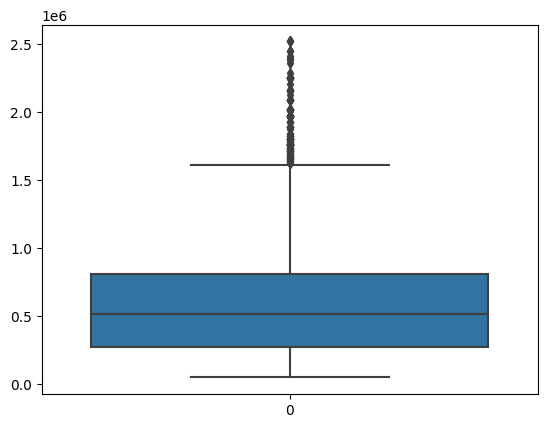

In [120]:
sns.boxplot(aplcn_df.AMT_CREDIT)
plt.show()

In [121]:
aplcn_df.AMT_CREDIT.describe()

count    6.479000e+03
mean     5.956850e+05
std      4.013033e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64

In [122]:
aplcn_df.AMT_CREDIT.max()

2517300.0

In [123]:
aplcn_df.AMT_CREDIT.min()

45000.0

In [124]:
aplcn_df.AMT_CREDIT.median()

508495.5

In [125]:
np.percentile(aplcn_df['AMT_CREDIT'], 75)

808650.0

In [126]:
np.percentile(aplcn_df['AMT_CREDIT'], 99)

1845304.4700000088

In [127]:
aplcn_df['AMT_CREDIT_RANGE']= pd.cut(aplcn_df.AMT_CREDIT,bins=[45000,200000,500000,800000,1200000,2000000,999999999])
aplcn_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)

(200000, 500000]        0.373088
(500000, 800000]        0.244709
(800000, 1200000]       0.172254
(45000, 200000]         0.121273
(1200000, 2000000]      0.081879
(2000000, 999999999]    0.006797
Name: AMT_CREDIT_RANGE, dtype: float64

#### create 'AMT_ANNUITY_RANGE' column from 'AMT_ANNUITY' column

In [128]:
aplcn_df.AMT_ANNUITY.value_counts()

9000.0      155
13500.0     130
6750.0       49
20250.0      36
10125.0      35
37800.0      35
12375.0      34
16875.0      32
11250.0      31
22500.0      30
26217.0      28
36459.0      27
31653.0      25
26640.0      24
26316.0      21
27000.0      20
33025.5      20
23773.5      19
31261.5      19
26446.5      17
32125.5      15
25537.5      15
21906.0      15
19125.0      15
7875.0       14
32602.5      14
33750.0      14
40320.0      14
22018.5      13
29250.0      13
32895.0      13
17095.5      12
36864.0      12
23494.5      11
29970.0      11
16852.5      11
14751.0      11
22527.0      11
37669.5      11
27423.0      11
21541.5      10
13963.5      10
23931.0      10
34587.0      10
17694.0      10
31464.0      10
30528.0      10
19867.5      10
16011.0       9
22050.0       9
25969.5       9
24543.0       9
34911.0       9
42642.0       9
20979.0       9
26284.5       9
21888.0       9
51543.0       9
23850.0       9
11074.5       9
32472.0       8
24592.5       8
22599.0 

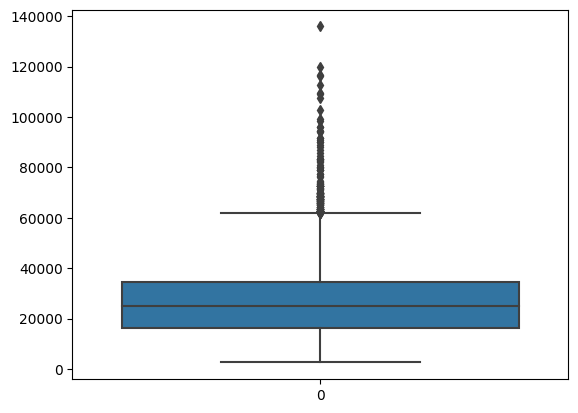

In [129]:
sns.boxplot(aplcn_df.AMT_ANNUITY)
plt.show()

In [130]:
aplcn_df.AMT_ANNUITY.max()

135936.0

In [131]:
aplcn_df.AMT_ANNUITY.min()

2596.5

In [132]:
aplcn_df.AMT_ANNUITY.median()

24853.5

In [133]:
np.percentile(aplcn_df['AMT_ANNUITY'], 75)

34587.0

In [134]:
np.percentile(aplcn_df['AMT_ANNUITY'], 99)

69754.5

In [135]:
aplcn_df['AMT_ANNUITY_RANGE']= pd.cut(aplcn_df.AMT_ANNUITY,bins=[1600,10000,25000,50000,75000,999999999])
aplcn_df['AMT_ANNUITY_RANGE'].value_counts(normalize=True)

(25000, 50000]        0.425529
(10000, 25000]        0.422750
(1600, 10000]         0.081803
(50000, 75000]        0.063281
(75000, 999999999]    0.006637
Name: AMT_ANNUITY_RANGE, dtype: float64

#### Create 'AMT_GOODS_PRICE_RANGE' column from 'AMT_GOODS_PRICE' column

In [136]:
aplcn_df.AMT_GOODS_PRICE.max()

2254500.0

In [137]:
aplcn_df.AMT_GOODS_PRICE.min()

0.0

In [138]:
aplcn_df.AMT_GOODS_PRICE.median()

450000.0

In [139]:
np.percentile(aplcn_df['AMT_GOODS_PRICE'],75 )

679500.0

In [140]:
np.percentile(aplcn_df['AMT_GOODS_PRICE'],99 )

1800000.0

In [141]:
aplcn_df['AMT_GOODS_PRICE_RANGE']= pd.cut(aplcn_df.AMT_GOODS_PRICE,bins=[0,200000,450000,1000000,2000000,999999999])
aplcn_df['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)

(200000, 450000]        0.375849
(450000, 1000000]       0.373379
(0, 200000]             0.141291
(1000000, 2000000]      0.106084
(2000000, 999999999]    0.003397
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

# Plot Box plot for each numerical column for clear understading of outliers

In [142]:
aplcn_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,6479.000000,6479.000000,6479.000000,6.479000e+03,6.479000e+03,6479.00000,6.479000e+03,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.00000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000,6479.000000
mean,103785.935175,0.077944,0.411792,1.672615e+05,5.956850e+05,26965.43286,5.355197e+05,0.020995,43.907426,185.464874,13.625973,8.112036,2.148943,2.044143,2.024078,12.094459,0.01775,0.050625,0.038123,0.085353,0.234450,0.176107,0.515555,1.379380,0.146936,1.364717,0.102639,2.619437,0.006637,0.007409,0.031023,0.232752,0.235839,1.630807
std,2187.918192,0.268104,0.714527,9.582781e+04,4.013033e+05,14386.55766,3.685356e+05,0.013969,11.865814,381.967939,9.699712,4.192355,0.901721,0.508249,0.503805,3.224592,0.13205,0.219248,0.191508,0.279427,0.423687,0.380941,0.189927,2.254134,0.455171,2.232239,0.374954,2.254538,0.083081,0.118941,0.190369,0.873525,0.583243,1.839537
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.50000,0.000000e+00,0.000938,21.109589,0.046575,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101899.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16368.75000,2.385000e+05,0.010006,34.078082,2.534247,5.406849,4.509589,2.000000,2.000000,2.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393837,0.000000,0.000000,0.000000,0.000000,0.719178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103780.000000,0.000000,0.000000,1.440000e+05,5.084955e+05,24853.50000,4.500000e+05,0.018850,43.306849,6.178082,12.293151,8.736986,2.000000,2.000000,2.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567360,0.000000,0.000000,0.000000,0.000000,2.041096,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,105680.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.00000,6.795000e+05,0.028663,53.630137,15.526027,20.479452,11.782192,3.000000,2.000000,2.000000,14.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.664863,2.000000,0.000000,2.000000,0.000000,4.245205,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,107555.000000,1.000000,7.000000,1.935000e+06,2.517300e+06,135936.00000,2.254500e+06,0.072508,68.931507,1000.665753,57.482192,17.063014,9.000000,3.000000,3.000000,22.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.855000,22.000000,5.000000,22.000000,5.000000,10.635616,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


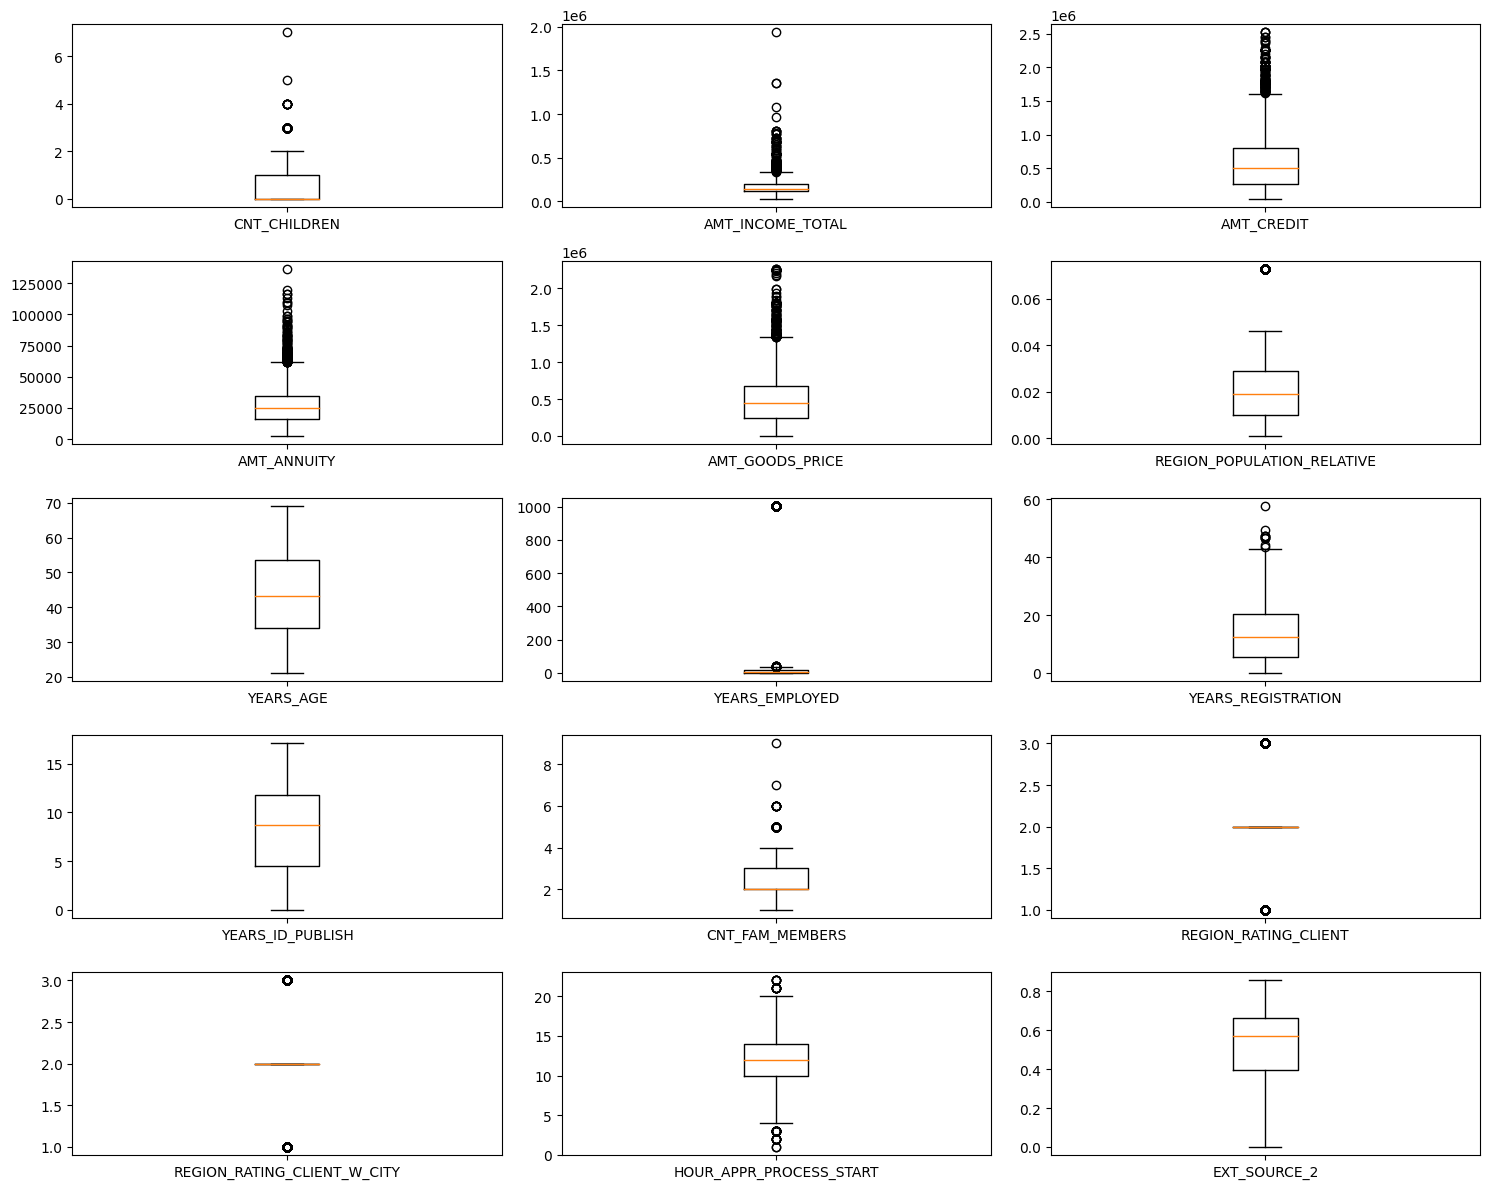

In [143]:
numerical_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE', 'YEARS_AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
                     'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                     'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                     'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE',
                     'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
a, b = 5, 3  # number of rows and columns
c = 0  # initialize plot counter

fig, axes = plt.subplots(a, b, figsize=(15, 12))

[c_ax.boxplot(data=aplcn_df, x=col, labels=[col]) for c_ax, col in zip(axes.flat, numerical_columns[:a*b])]


fig.tight_layout()
plt.show()

#### Observation
#### • EXT_SOURCE_2, YEARS_AGE, YEARS_ID_PUBLISH has no outlier value.
#### • REGION_POPULATION_RELATIVE has only one outlier value.
#### • Rest are having more than one outlier value.

# Univariate Analysis

In [144]:
aplcn_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YEARS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_

#### Target

In [145]:
aplcn_df.TARGET.value_counts(normalize = True)

0    0.922056
1    0.077944
Name: TARGET, dtype: float64

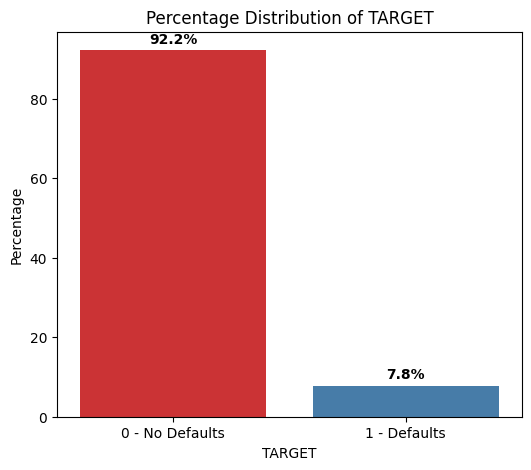

In [209]:
target_percentage = aplcn_df['TARGET'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 5))
sns.barplot(x=target_percentage.index, y=target_percentage.values, palette="Set1")
plt.title('Percentage Distribution of TARGET')
plt.xlabel('TARGET')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['0 - No Defaults', '1 - Defaults'])
for i, value in enumerate(target_percentage):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

#### Observation
#### Around 8% client with payment difficulties

In [147]:
# checking count of data types
aplcn_df.dtypes.value_counts()

float64     21
int64       13
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [148]:
# categorical variable - object type
object_variable = aplcn_df.select_dtypes(include=['object']).columns
object_variable

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

#### Plot subplots of each variable, count vs mean percentage

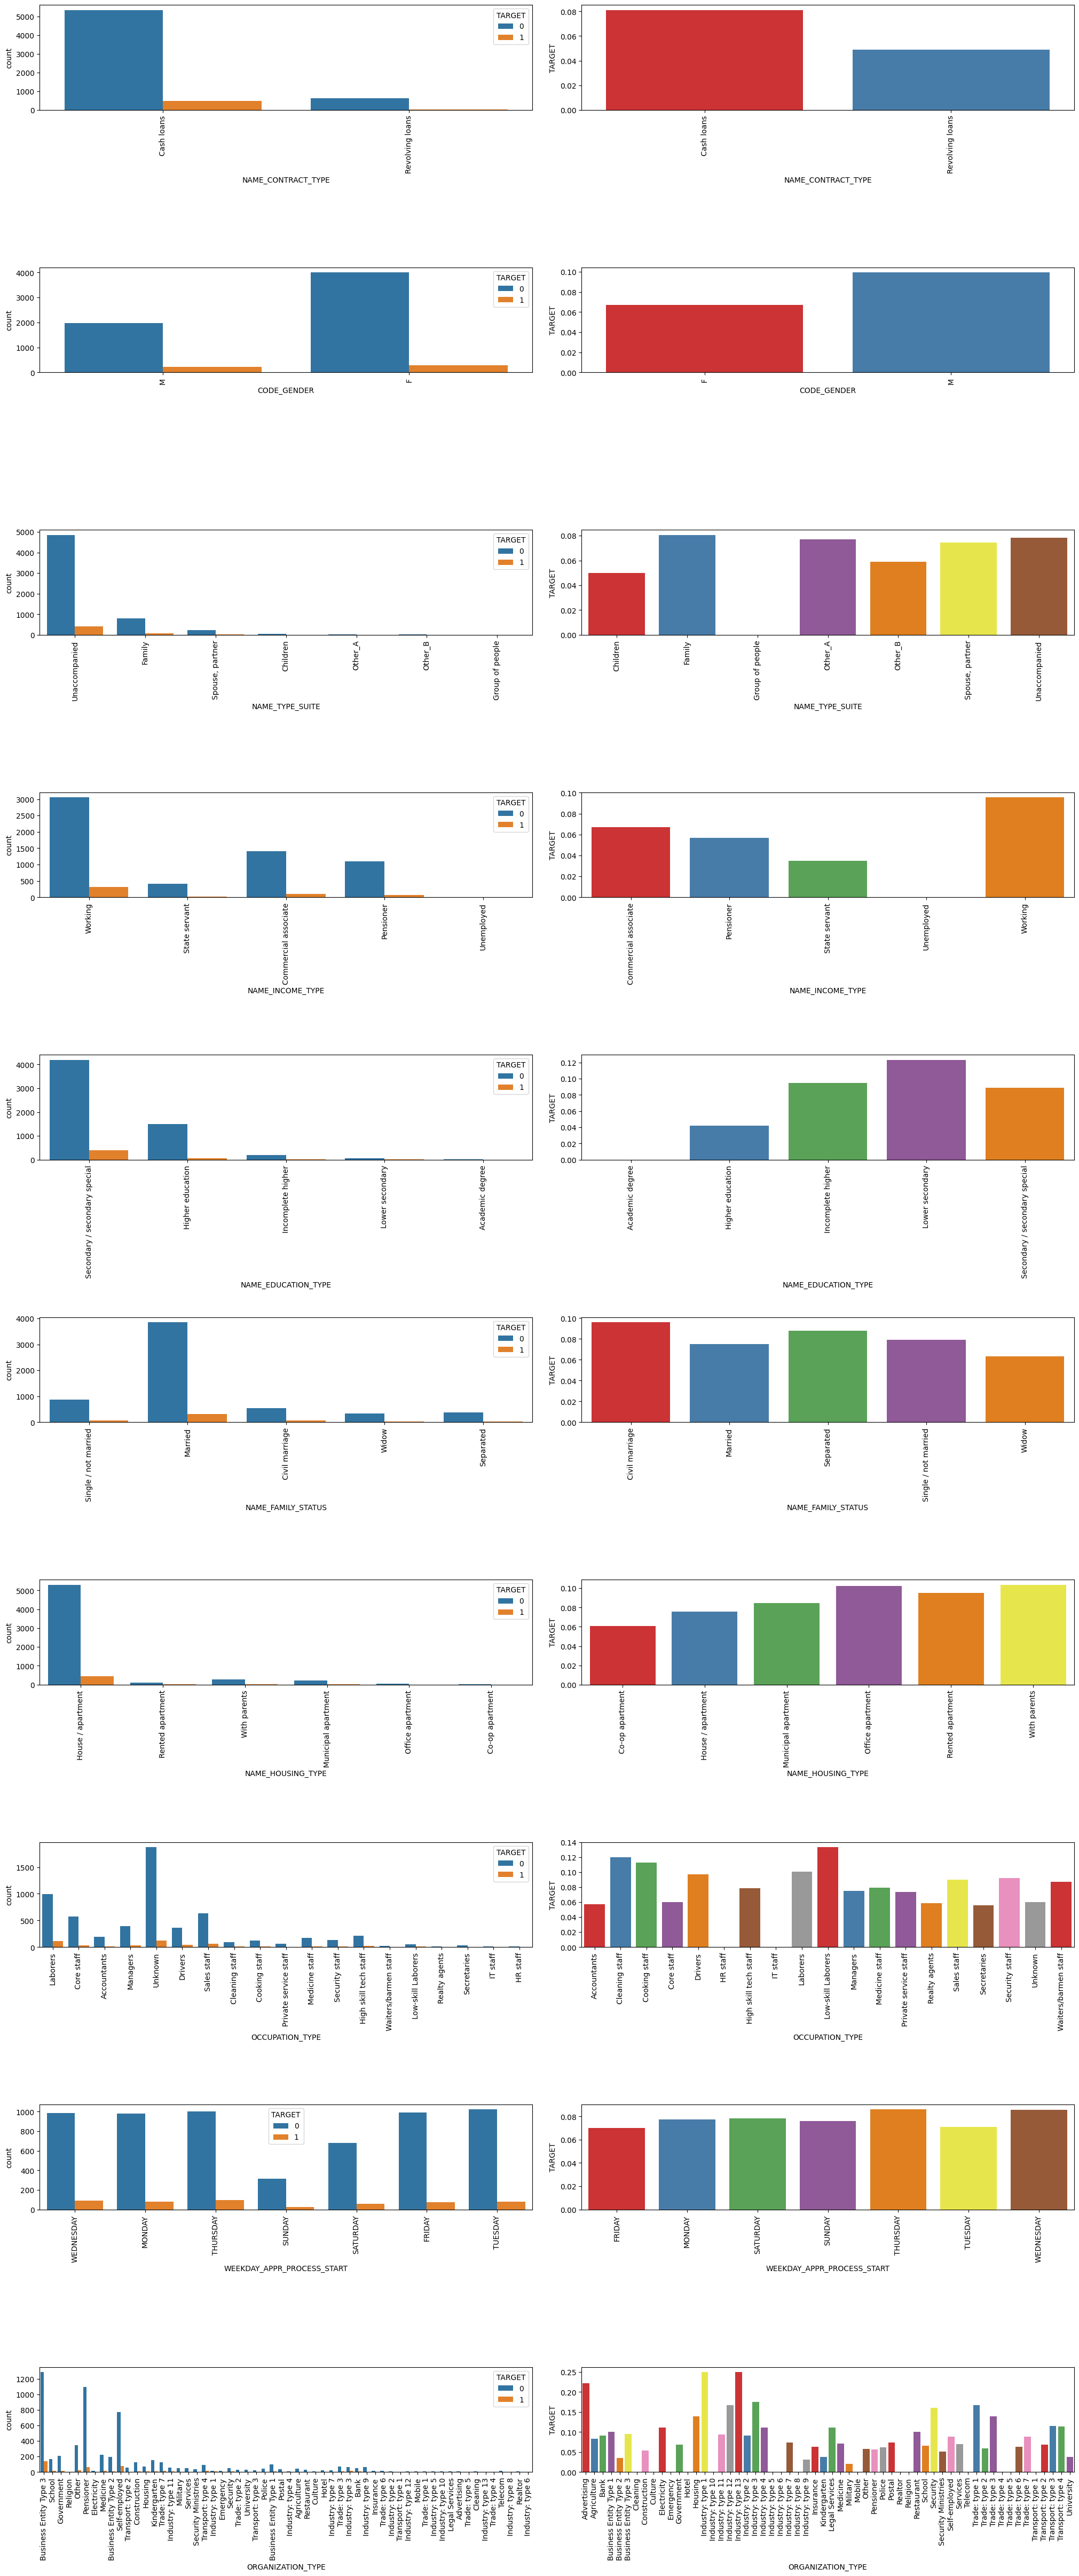

In [149]:
plt.figure(figsize=(25, 60))

# Iterate over each categorical variable
for i, var in enumerate(object_variable, 1):

    # Set up the first subplot (count plot)
    plt.subplot(len(object_variable), 2, i * 2 - 1)
    plt.subplots_adjust(wspace=0.1, hspace=1.5)  # Adjust subplot spacing
    sns.countplot(data=aplcn_df, x=var, hue='TARGET')  # Create count plot
    plt.xticks(rotation=90)  # Rotate x-axis tick labels for readability

    # Set up the second subplot (percentage bar plot)
    plt.subplot(len(object_variable), 2, i * 2)
    data_percentage = aplcn_df[[var, 'TARGET']].groupby([var], as_index=False).mean()  # Calculate mean percentages
    sns.barplot(data=data_percentage, x=var, y='TARGET', palette='Set1')  # Create bar plot
    plt.xticks(rotation=90)  # Rotate x-axis tick labels for readability


plt.show()

#### Observations

• NAME_CONTRACT_TYPE :
      Most of the customers has taken cash loan & persons who taken cash loan are less defaulter.
    
• CODE_GENDER :
      Most of the loan taken by female & has approx 7% default rate which is safer than male.
  
• NAME_TYPE_SUITE :
    Most of the loans taken by Unaccompanied people & default rate is approx 8%, which is safer.
  
• NAME_INCOME_TYPE :
    Working, commercial associate & pensioners are safest segment to target.
    
• NAME_EDUCATION_TYPE :
    Higher education is safest segment to target & default rate is less than 5%.
    
• NAME_FAMILY_STATUS :
    Married people are safe to target & default rate is less than 8%.
    
• NAME_HOUSING_TYPE :
    Customer who owns house/apartment are safest to target, defaults rate is approx 8%.
    
    
• OCCUPATION_TYPE :
    laborers, accountants, core stuff, managers are less defaulters.
    low skill labors & drivers are higher default rate.
    
• ORGANIZATION_TYPE :
    Transport type 3 are highest default rate.
    others, Business entity 3 are safest target, default rate is less than 10%.

In [150]:
# numerical variable - float & integer type
number_dt = aplcn_df.select_dtypes(include=['float64','int64']).columns
number_variable = aplcn_df[number_dt]

In [151]:
amt_variable = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

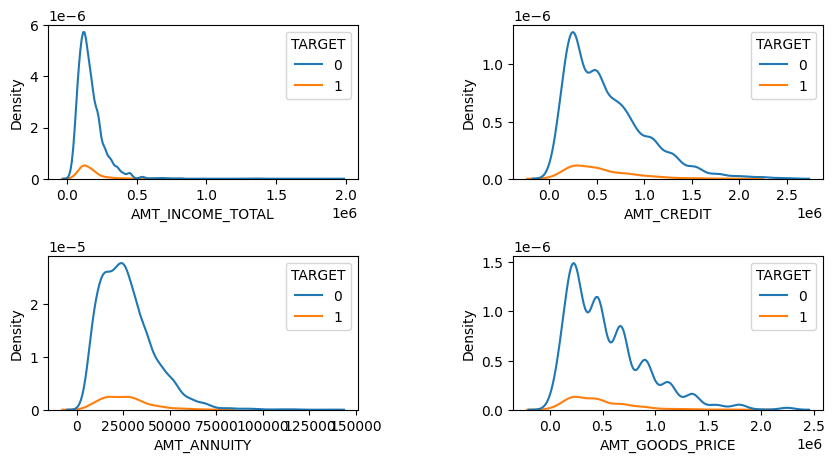

In [152]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_variable):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=number_variable,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

#### Observation
• AMT_INCOME_TOTAL :
    Most of the customer income between 0-10 Lakh
    
• AMT_CREDIT :
    Most of the credit amount between 0-10 Lakh
    
• AMT_ANNUITY :
    Most of the customer pay annuity between 0-50 Thousand
    
• AMT_GOODS_PRICE :
    Most of the goods price between 0-10 Lakh


# Bivariate and Multivariate Analysis

In [153]:
aplcn_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YEARS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_

In [154]:
number_variable.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25.920548,1.745205,9.994521,5.808219,1,2,2,10,0,0,0,0,0,0,0.262949,2.0,2.0,2.0,2.0,3.106849,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.931507,3.254795,3.249315,0.797260,2,1,1,11,0,0,0,0,0,0,0.622246,1.0,0.0,1.0,0.0,2.268493,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52.180822,0.616438,11.671233,6.934247,1,2,2,9,0,0,0,0,0,0,0.555912,0.0,0.0,0.0,0.0,2.232877,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52.068493,8.326027,26.939726,6.676712,2,2,2,17,0,0,0,0,0,0,0.650442,2.0,0.0,2.0,0.0,1.690411,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54.608219,8.323288,11.810959,9.473973,1,2,2,11,0,0,0,0,1,1,0.322738,0.0,0.0,0.0,0.0,3.030137,0.0,0.0,0.0,0.0,0.0,0.0


#### AMT_CREDIT vs AMT_GOODS_PRICE vs TARGET

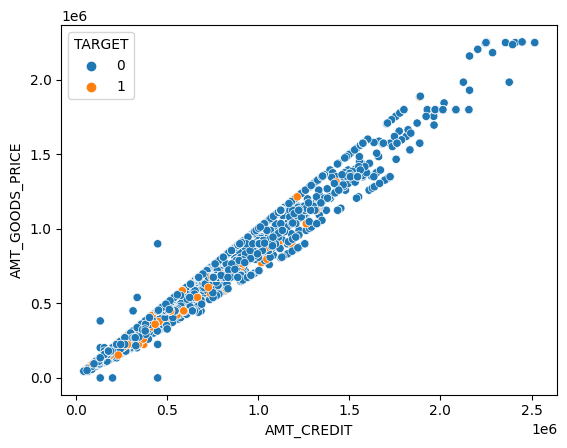

In [155]:
sns.scatterplot(data=number_variable,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')
plt.show()

#### Observation
• Amount credit and Goods price are co-related. If the amount credit increases, default rate decreases.

#### AMT_CREDIT vs AMT_INCOME_TOTAL vs TARGET

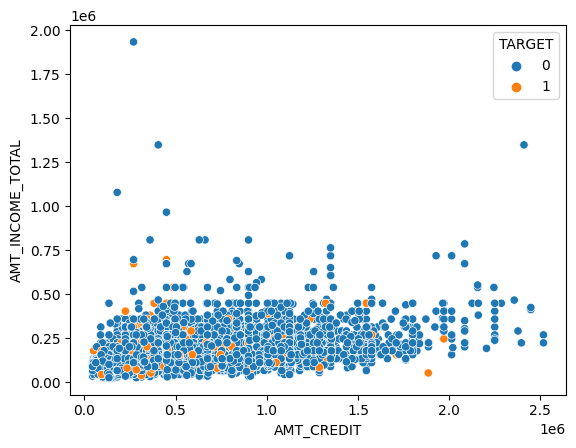

In [156]:
sns.scatterplot(data=number_variable,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

#### Observation
• People having income less than 10 Lakh are taking loans, out of which taking loan less than 15 Lakh could turn out to be defaulters. we can target those customers whose income below 10 Lakh and taking loan above 15 Lakh.

#### AMT_CREDIT vs YEARS_EMPLOYED vs TARGET

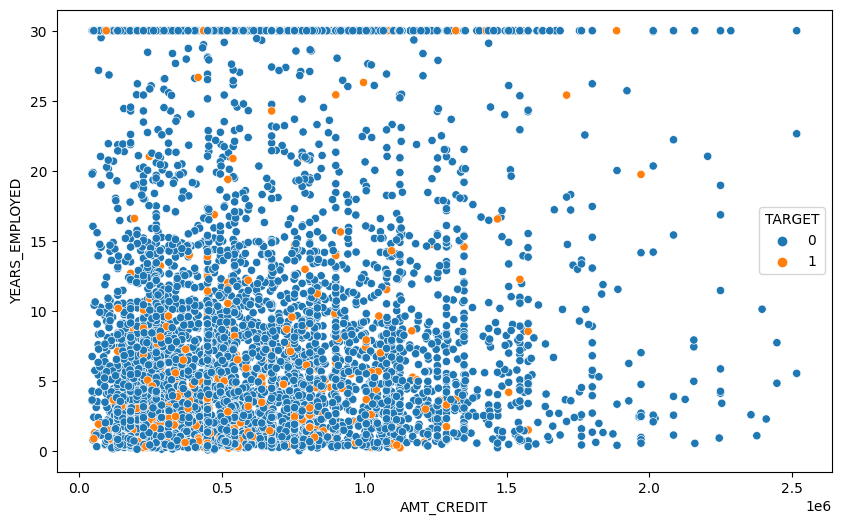

In [157]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=number_variable, x='AMT_CREDIT', y=np.minimum(number_variable['YEARS_EMPLOYED'], 30), hue='TARGET')
plt.show()

#### Observation
• People having more than 15 years of experience and taking loan above 15 lakh are less defaulters.


#### AMT_CREDIT vs AMT_ANNUITY vs TARGET

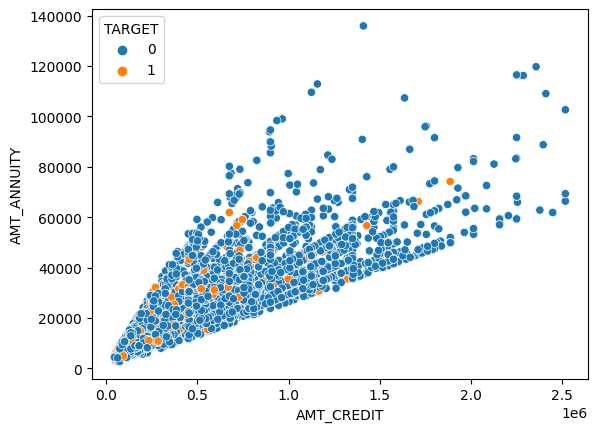

In [158]:
sns.scatterplot(data=number_variable,x='AMT_CREDIT',y='AMT_ANNUITY',hue='TARGET')
plt.show()

#### Observation
• People who are paying more than 40 thousand annuity and taking loan more tahn 15 lakh to 25 lakh are less defaulters and safer target.

#### Relationship between 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'

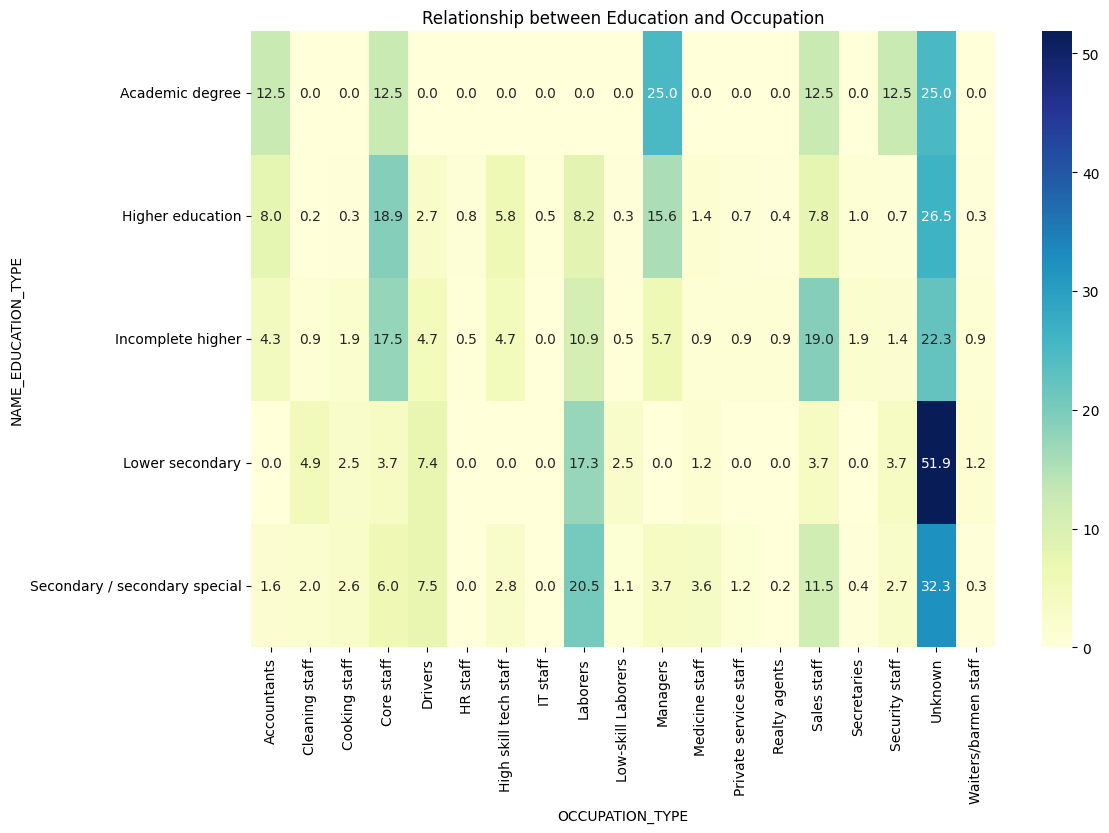

In [165]:
# Create a cross-tabulation (crosstab) of NAME_EDUCATION_TYPE and OCCUPATION_TYPE
cross_tab = pd.crosstab(aplcn_df['NAME_EDUCATION_TYPE'], aplcn_df['OCCUPATION_TYPE'], normalize='index') * 100

# Create a heatmap to visualize the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True)
plt.title('Relationship between Education and Occupation')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('NAME_EDUCATION_TYPE')

plt.show()

#### Observation
#### Managers are predominantly associated with higher education and academic degrees.
#### Core staffs are primarily linked to higher education and incomplete higher education levels.
#### Laborers are predominantly associated with secondary and lower secondary education levels.

#### We can plot a pair plot for better understanding

In [160]:
amt_variable = number_variable[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

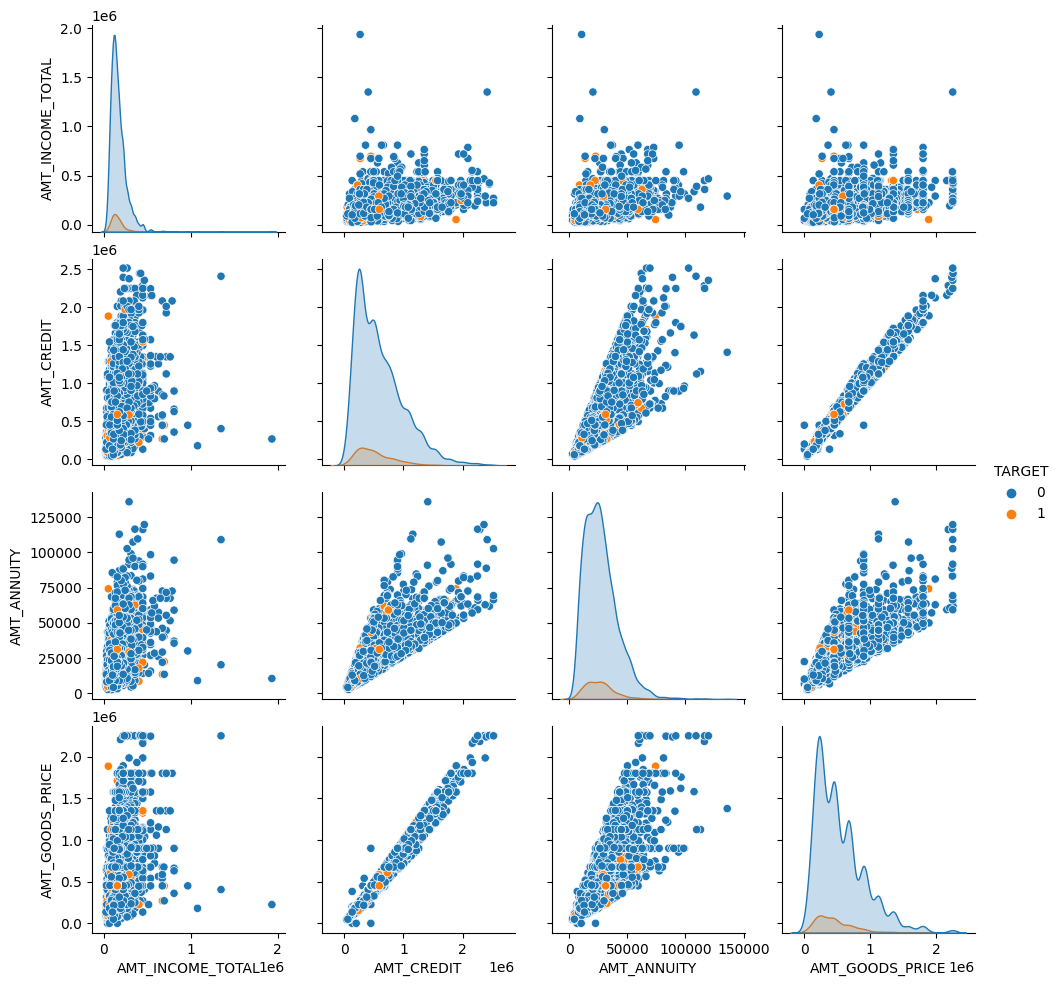

In [161]:
sns.pairplot(data=amt_variable,hue='TARGET')

#### Observation
#### • AMT_GOODS_PRICE is proportional to AMT_CREDIT & AMT_ANNUITY

# Import previous application data

In [166]:
pre_aplcn_df = pd.read_csv('previous_application.csv')

In [167]:
pre_aplcn_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
pre_aplcn_df.shape

(361585, 37)

In [169]:
pre_aplcn_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361585 entries, 0 to 361584
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   361585 non-null  int64  
 1   SK_ID_CURR                   361585 non-null  int64  
 2   NAME_CONTRACT_TYPE           361585 non-null  object 
 3   AMT_ANNUITY                  282497 non-null  float64
 4   AMT_APPLICATION              361585 non-null  float64
 5   AMT_CREDIT                   361585 non-null  float64
 6   AMT_DOWN_PAYMENT             172267 non-null  float64
 7   AMT_GOODS_PRICE              279986 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   361585 non-null  object 
 9   HOUR_APPR_PROCESS_START      361585 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  361585 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       361585 non-null  int64  
 12  RATE_DOWN_PAYMENT            172267 non-null  float64
 13 

In [170]:
pre_aplcn_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,3.615850e+05,361585.000000,282497.000000,3.615850e+05,3.615850e+05,1.722670e+05,2.799860e+05,361585.000000,361585.000000,172267.000000,1306.000000,1306.000000,361585.000000,3.615840e+05,282498.000000,218587.000000,218587.000000,218587.000000,218587.000000,218587.000000,218587.000000
mean,1.921356e+06,278515.544859,15712.221882,1.720689e+05,1.922721e+05,6.685713e+03,2.222547e+05,12.493201,0.996330,0.079743,0.189343,0.778097,-889.238381,3.411348e+02,15.829280,342797.836088,13708.869622,32956.415514,76170.128356,81520.130763,0.327604
std,5.332834e+05,102832.367987,14651.673728,2.879679e+05,3.137507e+05,1.979911e+04,3.097830e+05,3.331717,0.060469,0.107749,0.087277,0.098905,783.189378,1.163793e+04,14.337352,87848.447315,72181.039088,105733.656630,149362.017633,153000.353407,0.469341
min,1.000001e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059121,0.373150,-2922.000000,-1.000000e+00,0.000000,-2920.000000,-2892.000000,-2801.000000,-2889.000000,-2847.000000,0.000000
25%,1.458997e+06,189509.000000,6228.180000,1.980000e+04,2.470050e+04,0.000000e+00,4.962150e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1321.000000,-1.000000e+00,6.000000,365243.000000,-1642.000000,-1260.000000,-1330.000000,-1286.000000,0.000000
50%,1.921774e+06,278793.000000,11110.365000,7.060500e+04,7.940250e+04,1.683000e+03,1.084028e+05,12.000000,1.000000,0.052486,0.189136,0.835095,-589.000000,5.000000e+00,12.000000,365243.000000,-834.000000,-369.000000,-542.000000,-505.000000,0.000000
75%,2.382781e+06,367800.000000,20250.000000,1.800000e+05,2.048805e+05,7.721798e+03,2.295000e+05,15.000000,1.000000,0.108910,0.193330,0.852537,-283.000000,9.300000e+01,24.000000,365243.000000,-410.000000,120.000000,-76.000000,-46.000000,1.000000
max,2.845382e+06,456255.000000,417927.645000,4.005000e+06,4.104351e+06,1.964970e+06,4.005000e+06,23.000000,1.000000,0.989740,1.000000,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [171]:
pre_aplcn_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Fixing columns( identify and delete Unnecessary columns)

In [172]:
Unnecessary_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [173]:
len(Unnecessary_col)

4

In [174]:
pre_aplcn_df.drop(columns = Unnecessary_col, axis = 1, inplace = True)

## Handling Missing Values

In [175]:
pre_aplcn_df.isnull().sum() # checking null values present in data set

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                   79088
AMT_APPLICATION                   0
AMT_CREDIT                        0
AMT_DOWN_PAYMENT             189318
AMT_GOODS_PRICE               81599
RATE_DOWN_PAYMENT            189318
RATE_INTEREST_PRIMARY        360279
RATE_INTEREST_PRIVILEGED     360279
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE              176933
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               1
NAME_PORTFOLIO                    1
NAME_PRODUCT_TYPE                 1
CHANNEL_TYPE                      1
SELLERPLACE_AREA                  1
NAME_SELLER_INDUSTRY              1
CNT_PAYMENT                   79087
NAME_YIELD_GROUP                  1
PRODUCT_COMBINATION              66
DAYS_FIRST_DRAWING          

In [176]:
missing_percentage = (pre_aplcn_df.isnull().sum() / len(pre_aplcn_df)) * 100

In [177]:
missing_percentage

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                  21.872589
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000000
AMT_DOWN_PAYMENT             52.357814
AMT_GOODS_PRICE              22.567031
RATE_DOWN_PAYMENT            52.357814
RATE_INTEREST_PRIMARY        99.638812
RATE_INTEREST_PRIVILEGED     99.638812
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_STATUS          0.000000
DAYS_DECISION                 0.000000
NAME_PAYMENT_TYPE             0.000000
CODE_REJECT_REASON            0.000000
NAME_TYPE_SUITE              48.932616
NAME_CLIENT_TYPE              0.000000
NAME_GOODS_CATEGORY           0.000277
NAME_PORTFOLIO                0.000277
NAME_PRODUCT_TYPE             0.000277
CHANNEL_TYPE                  0.000277
SELLERPLACE_AREA              0.000277
NAME_SELLER_INDUSTRY          0.000277
CNT_PAYMENT                  21.872312
NAME_YIELD_GROUP         

In [178]:
# Define the threshold for null values
threshold = len(pre_aplcn_df) * 0.4

# Create a list of columns with null values exceeding the threshold
pre_columns_with_above_40percent_nulls = pre_aplcn_df.columns[pre_aplcn_df.isnull().sum() > threshold].tolist()
pre_columns_with_above_40percent_nulls

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [179]:
pre_aplcn_df.drop(columns =pre_columns_with_above_40percent_nulls, axis = 1, inplace = True)

In [180]:
pre_aplcn_df.shape

(361585, 28)

In [181]:
pre_aplcn_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
missing_percentage = (pre_aplcn_df.isnull().sum() / len(pre_aplcn_df)) * 100
missing_percentage

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                  21.872589
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000000
AMT_GOODS_PRICE              22.567031
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_STATUS          0.000000
DAYS_DECISION                 0.000000
NAME_PAYMENT_TYPE             0.000000
CODE_REJECT_REASON            0.000000
NAME_CLIENT_TYPE              0.000000
NAME_GOODS_CATEGORY           0.000277
NAME_PORTFOLIO                0.000277
NAME_PRODUCT_TYPE             0.000277
CHANNEL_TYPE                  0.000277
SELLERPLACE_AREA              0.000277
NAME_SELLER_INDUSTRY          0.000277
CNT_PAYMENT                  21.872312
NAME_YIELD_GROUP              0.000277
PRODUCT_COMBINATION           0.018253
DAYS_FIRST_DRAWING           39.547548
DAYS_FIRST_DUE               39.547548
DAYS_LAST_DUE_1ST_VERSION    39.547548
DAYS_LAST_DUE            

#### Checking AMT_ANNUITY

In [183]:
pre_aplcn_df['AMT_ANNUITY'].mean()

15712.221881860696

In [184]:
pre_aplcn_df['AMT_ANNUITY'].median()

11110.365

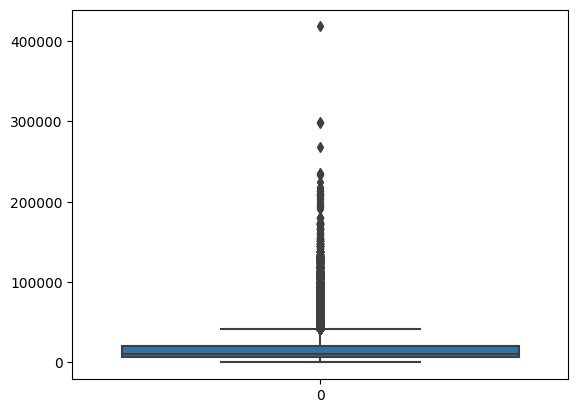

In [185]:
sns.boxplot(pre_aplcn_df.AMT_ANNUITY)
plt.show()

#### Clearly see the outliers in AMT_ANNUITY column, So, impute missing values with median is safe.

In [186]:
med_amt_annuity1 = pre_aplcn_df['AMT_ANNUITY'].median()
pre_aplcn_df['AMT_ANNUITY'].fillna(med_amt_annuity1, inplace=True)

#### AMT_GOODS_PRICE

In [187]:
pre_aplcn_df['AMT_GOODS_PRICE'].mean()

222254.67197924183

In [188]:
pre_aplcn_df['AMT_GOODS_PRICE'].median()

108402.75

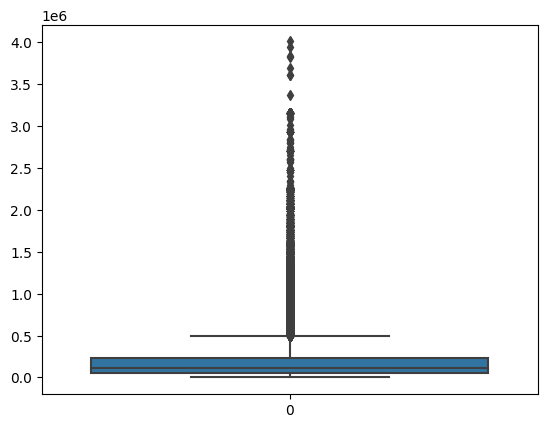

In [189]:
sns.boxplot(pre_aplcn_df.AMT_GOODS_PRICE)
plt.show()

#### Clearly see the outliers in the AMT_GOODS_PRICE column, So impute missing values with median is safe.

In [190]:
med_AMT_GOODS_PRICE1 = pre_aplcn_df['AMT_GOODS_PRICE'].median()
pre_aplcn_df['AMT_GOODS_PRICE'].fillna(med_AMT_GOODS_PRICE1, inplace=True)

#### Checking CNT_PAYMENT

In [191]:
pre_aplcn_df['CNT_PAYMENT'].head()

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
Name: CNT_PAYMENT, dtype: float64

In [192]:
pre_aplcn_df['CNT_PAYMENT'].mean()

15.829280207293502

In [193]:
pre_aplcn_df['CNT_PAYMENT'].median()

12.0

In [194]:
pre_aplcn_df['CNT_PAYMENT'].mode()[0]

12.0

#### Checking CNT_PAYMENT column with NAME_CONTRACT_TYPE

In [195]:
pre_aplcn_df[pre_aplcn_df['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        64689
Refused          8718
Unused offer     5678
Approved            2
dtype: int64

#### Here we see that majority of the status is cancelled. So, impute missing values with mean or median is not good option. we can impute this missing values wit 0 instead.

In [196]:
pre_aplcn_df['CNT_PAYMENT'].fillna(0, inplace=True)

#### Checking PRODUCT_COMBINATION

In [197]:
pre_aplcn_df['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

#### This is categorical variable, so impute missing values with mode

In [198]:
pre_aplcn_df['PRODUCT_COMBINATION'].mode()[0]

'Cash'

In [199]:
mod_PRODUCT_COMBINATION = pre_aplcn_df['PRODUCT_COMBINATION'].mode()[0]
pre_aplcn_df['PRODUCT_COMBINATION'].fillna(mod_PRODUCT_COMBINATION, inplace=True)

#### Rechecking columns with null values

In [200]:
pre_aplcn_df.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        0
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               1
NAME_PORTFOLIO                    1
NAME_PRODUCT_TYPE                 1
CHANNEL_TYPE                      1
SELLERPLACE_AREA                  1
NAME_SELLER_INDUSTRY              1
CNT_PAYMENT                       0
NAME_YIELD_GROUP                  1
PRODUCT_COMBINATION               0
DAYS_FIRST_DRAWING           142998
DAYS_FIRST_DUE               142998
DAYS_LAST_DUE_1ST_VERSION    142998
DAYS_LAST_DUE                142998
DAYS_TERMINATION             142998
NFLAG_INSURED_ON_APPROVAL   

#### Only one missing value in AMT_CREDIT column, we can ignore as it is negligible & will not impact in analysis

In [201]:
pre_aplcn_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Merge two data frame

In [202]:
combined_df = pd.merge(aplcn_df,pre_aplcn_df,how='inner',on='SK_ID_CURR')
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EMPLOYED_RANGE,INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,1.690411,0.0,0.0,0.0,0.0,0.0,0.0,"(50, 60]","(5, 10]","(100000, 200000]","(200000, 500000]","(25000, 50000]","(200000, 450000]",2078043,Cash loans,24246.000,675000.0,675000.0,675000.0,XNA,Approved,-181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
1,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,3.030137,0.0,0.0,0.0,0.0,0.0,0.0,"(50, 60]","(5, 10]","(100000, 200000]","(500000, 800000]","(10000, 25000]","(450000, 1000000]",2001242,Cash loans,16509.600,180000.0,180000.0,180000.0,XNA,Approved,-865,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
2,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,3.030137,0.0,0.0,0.0,0.0,0.0,0.0,"(50, 60]","(5, 10]","(100000, 200000]","(500000, 800000]","(10000, 25000]","(450000, 1000000]",2730157,Cash loans,13010.985,225000.0,284400.0,225000.0,XNA,Approved,-867,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),4.0,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
3,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,13.616438,1.306849,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,6.947945,0.0,0.0,0.0,0.0,1.0,1.0,"(40, 50]","(0, 5]","(0, 100000]","(200000, 500000]","(25000, 50000]","(450000, 1000000]",2218188,Consumer loans,17885.835,162598.5,162598.5,162598.5,XAP,Approved,-370,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,110.0,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-339.

In [203]:
combined_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YEARS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       '

# Combined data analysis

#### In this data frame there is two column name ['NAME_CASH_LOAN_PURPOSE']  & ['NAME_CONTRACT_STATUS']

#### Plot a count plot with this column and alalyse it.

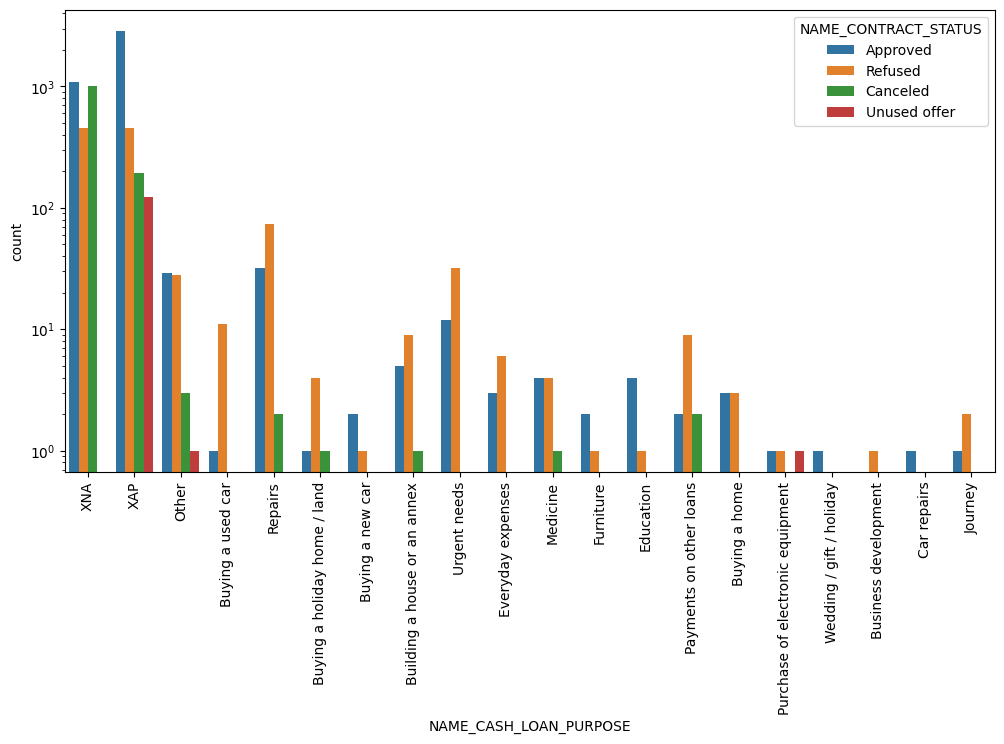

In [204]:
plt.figure(figsize=(12,6))

sns.countplot(data=combined_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### Observation
• Ignore XAP & XNA
• Repairs, Others & Urgent Needs are having most approved and refused cases respectively.

#### Analyse ['NAME_CONTRACT_STATUS'] and ['TARGET']

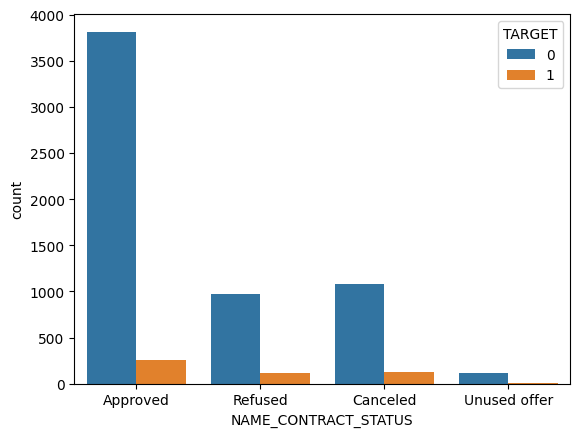

In [205]:
sns.countplot(data=combined_df,x='NAME_CONTRACT_STATUS',hue='TARGET')
plt.show()

In [206]:
percentage_df = combined_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].value_counts(normalize=True).unstack() * 100
print(percentage_df)

TARGET                        0          1
NAME_CONTRACT_STATUS                      
Approved              93.779198   6.220802
Canceled              89.543568  10.456432
Refused               88.979964  11.020036
Unused offer          91.129032   8.870968


#### Observation
• Most of the application which are previously cancelled or refused, approx 90 % of them are consider in current data set.

#### Analyse ['NAME_CASH_LOAN_PURPOSE'] and ['TARGET']

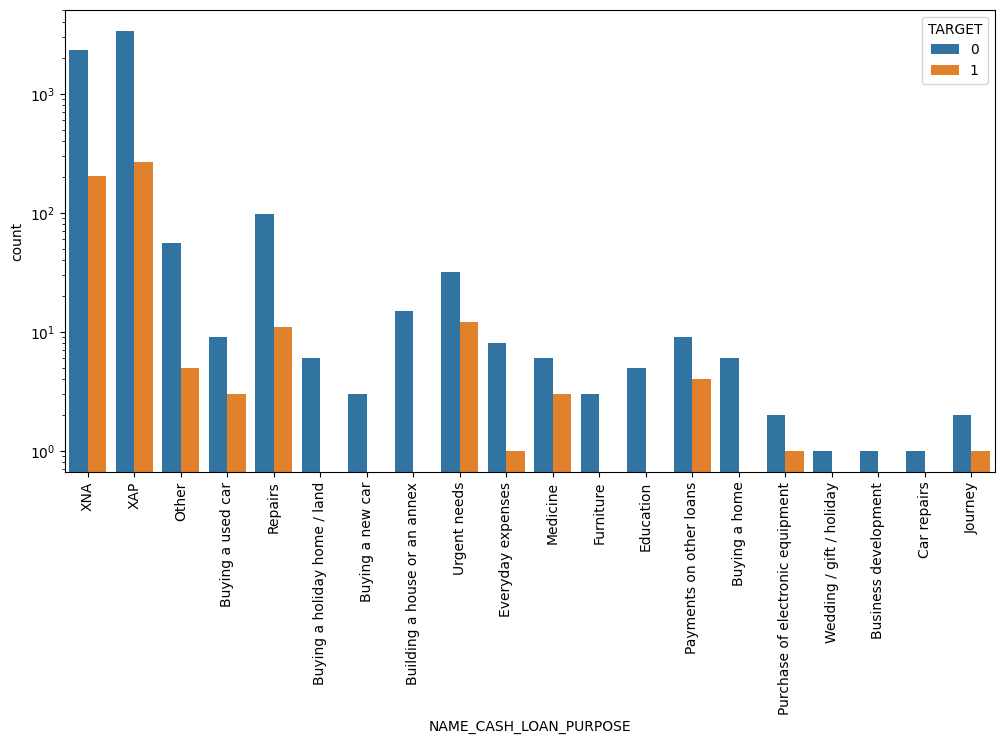

In [207]:
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df,x='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [208]:
percentage_df1 = combined_df.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].value_counts(normalize=True).unstack() * 100
print(percentage_df1)

TARGET                                     0          1
NAME_CASH_LOAN_PURPOSE                                 
Building a house or an annex      100.000000        NaN
Business development              100.000000        NaN
Buying a holiday home / land      100.000000        NaN
Buying a home                     100.000000        NaN
Buying a new car                  100.000000        NaN
Buying a used car                  75.000000  25.000000
Car repairs                       100.000000        NaN
Education                         100.000000        NaN
Everyday expenses                  88.888889  11.111111
Furniture                         100.000000        NaN
Journey                            66.666667  33.333333
Medicine                           66.666667  33.333333
Other                              91.803279   8.196721
Payments on other loans            69.230769  30.769231
Purchase of electronic equipment   66.666667  33.333333
Repairs                            89.814815  10

#### Observation
• Buying a garage category of previously loan purpose are less defaulters.
• Hobby category of previously loan purpose are highest percentage of defaulters.
• Repairs, Others and Urgent need category of previously loan purpose are above 85 % of success paying rate.


# CONCLUSION

## Recommendation

#### • Bank should target the customers
        • Customers having income below 10 Lakh
        • Customers working with Other, Business entity 3, self employed and pensioners - organization type
        • Customers working as accountants, Core stuff, Managers and laborers - Occupation type
        • Customers having own house/apartment
        • Customers having higher education
        • Customers paying annuity up to 50 thousands
        • Customers are married
        • Unaccompanied Customers
        • Female Customers
        • Credit amount should be up to 10 lakh
        • Bank should analyze and consider previously cancelled and refused customers       

# Avoid

#### Bank should avoid the customers
        • Customers are transport type 3 from organization type
        • Customers are Low skill Laborers and Drivers from occupation type
        